# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.last_bin, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 11223 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.last_bin, durl=Durl.all, max_distance=2)


  0% (    0 of 11223) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    9 of 11223) |                     | Elapsed Time: 0:00:25 ETA: 8:42:20

  0% (   23 of 11223) |                     | Elapsed Time: 0:00:25 ETA: 3:25:55

  0% (   39 of 11223) |                     | Elapsed Time: 0:00:25 ETA: 2:02:15

  0% (   55 of 11223) |                     | Elapsed Time: 0:00:25 ETA: 1:27:18

  0% (   70 of 11223) |                     | Elapsed Time: 0:00:26 ETA: 0:02:36

  0% (   94 of 11223) |                     | Elapsed Time: 0:00:26 ETA: 0:02:27

  0% (  109 of 11223) |                     | Elapsed Time: 0:00:26 ETA: 0:02:32

  1% (  124 of 11223) |                     | Elapsed Time: 0:00:26 ETA: 0:02:31

  1% (  141 of 11223) |                     | Elapsed Time: 0:00:26 ETA: 0:02:31

  1% (  153 of 11223) |                     | Elapsed Time: 0:00:27 ETA: 0:02:42

  1% (  168 of 11223) |                     | Elapsed Time: 0:00:27 ETA: 0:02:43

  1% (  184 of 11223) |                     | Elapsed Time: 0:00:27 ETA: 0:02:39

  1% (  201 of 11223) |                     | Elapsed Time: 0:00:27 ETA: 0:02:36

  1% (  218 of 11223) |                     | Elapsed Time: 0:00:28 ETA: 0:02:30

  2% (  233 of 11223) |                     | Elapsed Time: 0:00:28 ETA: 0:02:26

  2% (  248 of 11223) |                     | Elapsed Time: 0:00:28 ETA: 0:02:27

  2% (  264 of 11223) |                     | Elapsed Time: 0:00:28 ETA: 0:02:28

  2% (  281 of 11223) |                     | Elapsed Time: 0:00:28 ETA: 0:02:30

  2% (  298 of 11223) |                     | Elapsed Time: 0:00:29 ETA: 0:02:27

  2% (  314 of 11223) |                     | Elapsed Time: 0:00:29 ETA: 0:02:25

  2% (  329 of 11223) |                     | Elapsed Time: 0:00:29 ETA: 0:02:25

  3% (  346 of 11223) |                     | Elapsed Time: 0:00:29 ETA: 0:02:23

  3% (  362 of 11223) |                     | Elapsed Time: 0:00:29 ETA: 0:02:22

  3% (  378 of 11223) |                     | Elapsed Time: 0:00:30 ETA: 0:02:21

  3% (  394 of 11223) |                     | Elapsed Time: 0:00:30 ETA: 0:02:21

  3% (  410 of 11223) |                     | Elapsed Time: 0:00:30 ETA: 0:02:20

  3% (  429 of 11223) |                     | Elapsed Time: 0:00:30 ETA: 0:02:20

  3% (  446 of 11223) |                     | Elapsed Time: 0:00:31 ETA: 0:02:18

  4% (  462 of 11223) |                     | Elapsed Time: 0:00:31 ETA: 0:02:18

  4% (  478 of 11223) |                     | Elapsed Time: 0:00:31 ETA: 0:02:17

  4% (  494 of 11223) |                     | Elapsed Time: 0:00:31 ETA: 0:02:17

  4% (  510 of 11223) |                     | Elapsed Time: 0:00:31 ETA: 0:02:18

  4% (  526 of 11223) |                     | Elapsed Time: 0:00:32 ETA: 0:02:19

  4% (  542 of 11223) |#                    | Elapsed Time: 0:00:32 ETA: 0:02:18

  5% (  562 of 11223) |#                    | Elapsed Time: 0:00:32 ETA: 0:02:18

  5% (  578 of 11223) |#                    | Elapsed Time: 0:00:32 ETA: 0:02:18

  5% (  592 of 11223) |#                    | Elapsed Time: 0:00:32 ETA: 0:02:21

  5% (  608 of 11223) |#                    | Elapsed Time: 0:00:33 ETA: 0:02:20

  5% (  624 of 11223) |#                    | Elapsed Time: 0:00:33 ETA: 0:02:20

  5% (  640 of 11223) |#                    | Elapsed Time: 0:00:33 ETA: 0:02:20

  5% (  657 of 11223) |#                    | Elapsed Time: 0:00:33 ETA: 0:02:16

  5% (  673 of 11223) |#                    | Elapsed Time: 0:00:34 ETA: 0:02:15

  6% (  688 of 11223) |#                    | Elapsed Time: 0:00:34 ETA: 0:02:18

  6% (  710 of 11223) |#                    | Elapsed Time: 0:00:34 ETA: 0:02:20

  6% (  726 of 11223) |#                    | Elapsed Time: 0:00:34 ETA: 0:02:22

  6% (  743 of 11223) |#                    | Elapsed Time: 0:00:34 ETA: 0:02:21

  6% (  759 of 11223) |#                    | Elapsed Time: 0:00:35 ETA: 0:02:21

  6% (  775 of 11223) |#                    | Elapsed Time: 0:00:35 ETA: 0:02:20

  7% (  790 of 11223) |#                    | Elapsed Time: 0:00:35 ETA: 0:02:22

  7% (  806 of 11223) |#                    | Elapsed Time: 0:00:35 ETA: 0:02:22

  7% (  822 of 11223) |#                    | Elapsed Time: 0:00:36 ETA: 0:02:22

  7% (  842 of 11223) |#                    | Elapsed Time: 0:00:36 ETA: 0:02:20

  7% (  855 of 11223) |#                    | Elapsed Time: 0:00:36 ETA: 0:02:25

  7% (  872 of 11223) |#                    | Elapsed Time: 0:00:36 ETA: 0:02:22

  7% (  890 of 11223) |#                    | Elapsed Time: 0:00:36 ETA: 0:02:17

  8% (  904 of 11223) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:19

  8% (  919 of 11223) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:21

  8% (  937 of 11223) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:14

  8% (  951 of 11223) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:22

  8% (  966 of 11223) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:25

  8% (  983 of 11223) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:21

  8% (  999 of 11223) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:21

  9% ( 1016 of 11223) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:18

  9% ( 1034 of 11223) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:12

  9% ( 1050 of 11223) |#                    | Elapsed Time: 0:00:39 ETA: 0:02:10

  9% ( 1065 of 11223) |#                    | Elapsed Time: 0:00:39 ETA: 0:02:10

  9% ( 1081 of 11223) |##                   | Elapsed Time: 0:00:39 ETA: 0:02:12

  9% ( 1096 of 11223) |##                   | Elapsed Time: 0:00:39 ETA: 0:02:16

  9% ( 1112 of 11223) |##                   | Elapsed Time: 0:00:39 ETA: 0:02:17

 10% ( 1131 of 11223) |##                   | Elapsed Time: 0:00:40 ETA: 0:02:16

 10% ( 1147 of 11223) |##                   | Elapsed Time: 0:00:40 ETA: 0:02:13

 10% ( 1163 of 11223) |##                   | Elapsed Time: 0:00:40 ETA: 0:02:11

 10% ( 1179 of 11223) |##                   | Elapsed Time: 0:00:40 ETA: 0:02:12

 10% ( 1195 of 11223) |##                   | Elapsed Time: 0:00:41 ETA: 0:02:13

 10% ( 1212 of 11223) |##                   | Elapsed Time: 0:00:41 ETA: 0:02:14

 10% ( 1228 of 11223) |##                   | Elapsed Time: 0:00:41 ETA: 0:02:12

 11% ( 1245 of 11223) |##                   | Elapsed Time: 0:00:41 ETA: 0:02:08

 11% ( 1263 of 11223) |##                   | Elapsed Time: 0:00:41 ETA: 0:02:06

 11% ( 1280 of 11223) |##                   | Elapsed Time: 0:00:42 ETA: 0:02:03

 11% ( 1297 of 11223) |##                   | Elapsed Time: 0:00:42 ETA: 0:02:04

 11% ( 1311 of 11223) |##                   | Elapsed Time: 0:00:42 ETA: 0:02:10

 11% ( 1324 of 11223) |##                   | Elapsed Time: 0:00:42 ETA: 0:02:17

 11% ( 1339 of 11223) |##                   | Elapsed Time: 0:00:43 ETA: 0:02:22

 12% ( 1355 of 11223) |##                   | Elapsed Time: 0:00:43 ETA: 0:02:22

 12% ( 1371 of 11223) |##                   | Elapsed Time: 0:00:43 ETA: 0:02:19

 12% ( 1381 of 11223) |##                   | Elapsed Time: 0:00:44 ETA: 0:04:17

 12% ( 1403 of 11223) |##                   | Elapsed Time: 0:00:44 ETA: 0:04:05

 12% ( 1418 of 11223) |##                   | Elapsed Time: 0:00:44 ETA: 0:03:58

 12% ( 1432 of 11223) |##                   | Elapsed Time: 0:00:45 ETA: 0:04:04

 12% ( 1448 of 11223) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:12

 13% ( 1464 of 11223) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:09

 13% ( 1480 of 11223) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:12

 13% ( 1496 of 11223) |##                   | Elapsed Time: 0:00:45 ETA: 0:02:09

 13% ( 1512 of 11223) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:09

 13% ( 1527 of 11223) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:11

 13% ( 1544 of 11223) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:12

 13% ( 1561 of 11223) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:09

 14% ( 1578 of 11223) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:07

 14% ( 1595 of 11223) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:04

 14% ( 1613 of 11223) |###                  | Elapsed Time: 0:00:47 ETA: 0:01:59

 14% ( 1631 of 11223) |###                  | Elapsed Time: 0:00:47 ETA: 0:01:59

 14% ( 1647 of 11223) |###                  | Elapsed Time: 0:00:47 ETA: 0:01:59

 14% ( 1663 of 11223) |###                  | Elapsed Time: 0:00:48 ETA: 0:02:01

 15% ( 1684 of 11223) |###                  | Elapsed Time: 0:00:48 ETA: 0:02:02

 15% ( 1699 of 11223) |###                  | Elapsed Time: 0:00:48 ETA: 0:02:06

 15% ( 1714 of 11223) |###                  | Elapsed Time: 0:00:48 ETA: 0:02:09

 15% ( 1729 of 11223) |###                  | Elapsed Time: 0:00:48 ETA: 0:02:12

 15% ( 1745 of 11223) |###                  | Elapsed Time: 0:00:49 ETA: 0:02:12

 15% ( 1763 of 11223) |###                  | Elapsed Time: 0:00:49 ETA: 0:02:07

 15% ( 1779 of 11223) |###                  | Elapsed Time: 0:00:49 ETA: 0:02:05

 16% ( 1797 of 11223) |###                  | Elapsed Time: 0:00:49 ETA: 0:02:03

 16% ( 1813 of 11223) |###                  | Elapsed Time: 0:00:50 ETA: 0:01:59

 16% ( 1833 of 11223) |###                  | Elapsed Time: 0:00:50 ETA: 0:02:01

 16% ( 1850 of 11223) |###                  | Elapsed Time: 0:00:50 ETA: 0:02:01

 16% ( 1865 of 11223) |###                  | Elapsed Time: 0:00:50 ETA: 0:02:03

 16% ( 1882 of 11223) |###                  | Elapsed Time: 0:00:50 ETA: 0:02:01

 16% ( 1899 of 11223) |###                  | Elapsed Time: 0:00:51 ETA: 0:01:59

 17% ( 1913 of 11223) |###                  | Elapsed Time: 0:00:51 ETA: 0:02:05

 17% ( 1930 of 11223) |###                  | Elapsed Time: 0:00:51 ETA: 0:02:03

 17% ( 1945 of 11223) |###                  | Elapsed Time: 0:00:51 ETA: 0:02:05

 17% ( 1965 of 11223) |###                  | Elapsed Time: 0:00:52 ETA: 0:02:05

 17% ( 1982 of 11223) |###                  | Elapsed Time: 0:00:52 ETA: 0:02:00

 17% ( 1999 of 11223) |###                  | Elapsed Time: 0:00:52 ETA: 0:01:59

 17% ( 2016 of 11223) |###                  | Elapsed Time: 0:00:52 ETA: 0:01:57

 18% ( 2031 of 11223) |###                  | Elapsed Time: 0:00:52 ETA: 0:02:00

 18% ( 2045 of 11223) |###                  | Elapsed Time: 0:00:53 ETA: 0:02:07

 18% ( 2061 of 11223) |###                  | Elapsed Time: 0:00:53 ETA: 0:02:08

 18% ( 2078 of 11223) |###                  | Elapsed Time: 0:00:53 ETA: 0:02:07

 18% ( 2094 of 11223) |###                  | Elapsed Time: 0:00:53 ETA: 0:02:09

 18% ( 2114 of 11223) |###                  | Elapsed Time: 0:00:54 ETA: 0:01:58

 18% ( 2132 of 11223) |###                  | Elapsed Time: 0:00:54 ETA: 0:01:54

 19% ( 2150 of 11223) |####                 | Elapsed Time: 0:00:54 ETA: 0:01:51

 19% ( 2167 of 11223) |####                 | Elapsed Time: 0:00:54 ETA: 0:01:51

 19% ( 2183 of 11223) |####                 | Elapsed Time: 0:00:54 ETA: 0:01:51

 19% ( 2199 of 11223) |####                 | Elapsed Time: 0:00:55 ETA: 0:01:53

 19% ( 2215 of 11223) |####                 | Elapsed Time: 0:00:55 ETA: 0:01:55

 19% ( 2231 of 11223) |####                 | Elapsed Time: 0:00:55 ETA: 0:01:57

 20% ( 2252 of 11223) |####                 | Elapsed Time: 0:00:55 ETA: 0:01:57

 20% ( 2269 of 11223) |####                 | Elapsed Time: 0:00:56 ETA: 0:01:56

 20% ( 2284 of 11223) |####                 | Elapsed Time: 0:00:56 ETA: 0:01:58

 20% ( 2299 of 11223) |####                 | Elapsed Time: 0:00:56 ETA: 0:01:59

 20% ( 2314 of 11223) |####                 | Elapsed Time: 0:00:56 ETA: 0:02:01

 20% ( 2331 of 11223) |####                 | Elapsed Time: 0:00:56 ETA: 0:02:00

 20% ( 2349 of 11223) |####                 | Elapsed Time: 0:00:57 ETA: 0:01:57

 21% ( 2366 of 11223) |####                 | Elapsed Time: 0:00:57 ETA: 0:01:52

 21% ( 2385 of 11223) |####                 | Elapsed Time: 0:00:57 ETA: 0:01:52

 21% ( 2401 of 11223) |####                 | Elapsed Time: 0:00:57 ETA: 0:01:52

 21% ( 2418 of 11223) |####                 | Elapsed Time: 0:00:57 ETA: 0:01:53

 21% ( 2434 of 11223) |####                 | Elapsed Time: 0:00:58 ETA: 0:01:55

 21% ( 2449 of 11223) |####                 | Elapsed Time: 0:00:58 ETA: 0:01:59

 21% ( 2466 of 11223) |####                 | Elapsed Time: 0:00:58 ETA: 0:01:57

 22% ( 2483 of 11223) |####                 | Elapsed Time: 0:00:58 ETA: 0:01:55

 22% ( 2500 of 11223) |####                 | Elapsed Time: 0:00:59 ETA: 0:01:56

 22% ( 2526 of 11223) |####                 | Elapsed Time: 0:00:59 ETA: 0:01:49

 22% ( 2544 of 11223) |####                 | Elapsed Time: 0:00:59 ETA: 0:01:45

 22% ( 2561 of 11223) |####                 | Elapsed Time: 0:00:59 ETA: 0:01:46

 22% ( 2579 of 11223) |####                 | Elapsed Time: 0:01:00 ETA: 0:01:46

 23% ( 2596 of 11223) |####                 | Elapsed Time: 0:01:00 ETA: 0:01:45

 23% ( 2612 of 11223) |####                 | Elapsed Time: 0:01:00 ETA: 0:01:49

 23% ( 2629 of 11223) |####                 | Elapsed Time: 0:01:00 ETA: 0:01:50

 23% ( 2645 of 11223) |####                 | Elapsed Time: 0:01:00 ETA: 0:01:50

 23% ( 2666 of 11223) |####                 | Elapsed Time: 0:01:01 ETA: 0:01:50

 23% ( 2682 of 11223) |#####                | Elapsed Time: 0:01:01 ETA: 0:01:50

 24% ( 2697 of 11223) |#####                | Elapsed Time: 0:01:01 ETA: 0:01:52

 24% ( 2713 of 11223) |#####                | Elapsed Time: 0:01:01 ETA: 0:01:52

 24% ( 2729 of 11223) |#####                | Elapsed Time: 0:01:02 ETA: 0:01:52

 24% ( 2745 of 11223) |#####                | Elapsed Time: 0:01:02 ETA: 0:01:52

 24% ( 2762 of 11223) |#####                | Elapsed Time: 0:01:02 ETA: 0:01:49

 24% ( 2776 of 11223) |#####                | Elapsed Time: 0:01:02 ETA: 0:01:51

 24% ( 2792 of 11223) |#####                | Elapsed Time: 0:01:02 ETA: 0:01:51

 25% ( 2806 of 11223) |#####                | Elapsed Time: 0:01:03 ETA: 0:01:55

 25% ( 2820 of 11223) |#####                | Elapsed Time: 0:01:03 ETA: 0:02:02

 25% ( 2836 of 11223) |#####                | Elapsed Time: 0:01:03 ETA: 0:02:01

 25% ( 2853 of 11223) |#####                | Elapsed Time: 0:01:03 ETA: 0:01:58

 25% ( 2870 of 11223) |#####                | Elapsed Time: 0:01:03 ETA: 0:01:54

 25% ( 2888 of 11223) |#####                | Elapsed Time: 0:01:04 ETA: 0:01:48

 25% ( 2903 of 11223) |#####                | Elapsed Time: 0:01:04 ETA: 0:01:44

 26% ( 2918 of 11223) |#####                | Elapsed Time: 0:01:04 ETA: 0:01:48

 26% ( 2934 of 11223) |#####                | Elapsed Time: 0:01:04 ETA: 0:01:49

 26% ( 2955 of 11223) |#####                | Elapsed Time: 0:01:05 ETA: 0:01:51

 26% ( 2971 of 11223) |#####                | Elapsed Time: 0:01:05 ETA: 0:01:51

 26% ( 2987 of 11223) |#####                | Elapsed Time: 0:01:05 ETA: 0:01:50

 26% ( 3005 of 11223) |#####                | Elapsed Time: 0:01:05 ETA: 0:01:46

 26% ( 3023 of 11223) |#####                | Elapsed Time: 0:01:05 ETA: 0:01:44

 27% ( 3039 of 11223) |#####                | Elapsed Time: 0:01:06 ETA: 0:01:43

 27% ( 3055 of 11223) |#####                | Elapsed Time: 0:01:06 ETA: 0:01:42

 27% ( 3073 of 11223) |#####                | Elapsed Time: 0:01:06 ETA: 0:01:41

 27% ( 3096 of 11223) |#####                | Elapsed Time: 0:01:06 ETA: 0:01:41

 27% ( 3114 of 11223) |#####                | Elapsed Time: 0:01:07 ETA: 0:01:40

 27% ( 3132 of 11223) |#####                | Elapsed Time: 0:01:07 ETA: 0:01:39

 28% ( 3146 of 11223) |#####                | Elapsed Time: 0:01:07 ETA: 0:01:43

 28% ( 3164 of 11223) |#####                | Elapsed Time: 0:01:07 ETA: 0:01:43

 28% ( 3181 of 11223) |#####                | Elapsed Time: 0:01:07 ETA: 0:01:44

 28% ( 3199 of 11223) |#####                | Elapsed Time: 0:01:08 ETA: 0:01:44

 28% ( 3217 of 11223) |######               | Elapsed Time: 0:01:08 ETA: 0:01:41

 28% ( 3234 of 11223) |######               | Elapsed Time: 0:01:08 ETA: 0:01:42

 28% ( 3249 of 11223) |######               | Elapsed Time: 0:01:08 ETA: 0:01:43

 29% ( 3267 of 11223) |######               | Elapsed Time: 0:01:09 ETA: 0:01:41

 29% ( 3285 of 11223) |######               | Elapsed Time: 0:01:09 ETA: 0:01:39

 29% ( 3303 of 11223) |######               | Elapsed Time: 0:01:09 ETA: 0:01:38

 29% ( 3319 of 11223) |######               | Elapsed Time: 0:01:09 ETA: 0:01:39

 29% ( 3335 of 11223) |######               | Elapsed Time: 0:01:09 ETA: 0:01:38

 29% ( 3351 of 11223) |######               | Elapsed Time: 0:01:10 ETA: 0:01:41

 30% ( 3367 of 11223) |######               | Elapsed Time: 0:01:10 ETA: 0:01:46

 30% ( 3383 of 11223) |######               | Elapsed Time: 0:01:10 ETA: 0:01:47

 30% ( 3398 of 11223) |######               | Elapsed Time: 0:01:10 ETA: 0:01:48

 30% ( 3413 of 11223) |######               | Elapsed Time: 0:01:10 ETA: 0:01:49

 30% ( 3428 of 11223) |######               | Elapsed Time: 0:01:11 ETA: 0:01:49

 30% ( 3444 of 11223) |######               | Elapsed Time: 0:01:11 ETA: 0:01:47

 30% ( 3460 of 11223) |######               | Elapsed Time: 0:01:11 ETA: 0:01:45

 30% ( 3477 of 11223) |######               | Elapsed Time: 0:01:11 ETA: 0:01:43

 31% ( 3493 of 11223) |######               | Elapsed Time: 0:01:12 ETA: 0:01:40

 31% ( 3516 of 11223) |######               | Elapsed Time: 0:01:12 ETA: 0:01:39

 31% ( 3532 of 11223) |######               | Elapsed Time: 0:01:12 ETA: 0:01:38

 31% ( 3548 of 11223) |######               | Elapsed Time: 0:01:12 ETA: 0:01:39

 31% ( 3564 of 11223) |######               | Elapsed Time: 0:01:12 ETA: 0:01:39

 31% ( 3581 of 11223) |######               | Elapsed Time: 0:01:13 ETA: 0:01:39

 32% ( 3599 of 11223) |######               | Elapsed Time: 0:01:13 ETA: 0:01:37

 32% ( 3616 of 11223) |######               | Elapsed Time: 0:01:13 ETA: 0:01:36

 32% ( 3633 of 11223) |######               | Elapsed Time: 0:01:13 ETA: 0:01:35

 32% ( 3648 of 11223) |######               | Elapsed Time: 0:01:14 ETA: 0:01:37

 32% ( 3664 of 11223) |######               | Elapsed Time: 0:01:14 ETA: 0:01:39

 32% ( 3680 of 11223) |######               | Elapsed Time: 0:01:14 ETA: 0:01:40

 32% ( 3696 of 11223) |######               | Elapsed Time: 0:01:14 ETA: 0:01:41

 33% ( 3713 of 11223) |######               | Elapsed Time: 0:01:14 ETA: 0:01:40

 33% ( 3731 of 11223) |######               | Elapsed Time: 0:01:15 ETA: 0:01:36

 33% ( 3747 of 11223) |#######              | Elapsed Time: 0:01:15 ETA: 0:01:37

 33% ( 3765 of 11223) |#######              | Elapsed Time: 0:01:15 ETA: 0:01:34

 33% ( 3788 of 11223) |#######              | Elapsed Time: 0:01:15 ETA: 0:01:33

 33% ( 3806 of 11223) |#######              | Elapsed Time: 0:01:16 ETA: 0:01:33

 34% ( 3824 of 11223) |#######              | Elapsed Time: 0:01:16 ETA: 0:01:32

 34% ( 3842 of 11223) |#######              | Elapsed Time: 0:01:16 ETA: 0:01:32

 34% ( 3860 of 11223) |#######              | Elapsed Time: 0:01:16 ETA: 0:01:31

 34% ( 3877 of 11223) |#######              | Elapsed Time: 0:01:16 ETA: 0:01:31

 34% ( 3893 of 11223) |#######              | Elapsed Time: 0:01:17 ETA: 0:01:31

 34% ( 3909 of 11223) |#######              | Elapsed Time: 0:01:17 ETA: 0:01:33

 35% ( 3929 of 11223) |#######              | Elapsed Time: 0:01:17 ETA: 0:01:33

 35% ( 3945 of 11223) |#######              | Elapsed Time: 0:01:17 ETA: 0:01:35

 35% ( 3962 of 11223) |#######              | Elapsed Time: 0:01:18 ETA: 0:01:33

 35% ( 3978 of 11223) |#######              | Elapsed Time: 0:01:18 ETA: 0:01:34

 35% ( 3996 of 11223) |#######              | Elapsed Time: 0:01:18 ETA: 0:01:31

 35% ( 4014 of 11223) |#######              | Elapsed Time: 0:01:18 ETA: 0:01:30

 35% ( 4031 of 11223) |#######              | Elapsed Time: 0:01:18 ETA: 0:01:28

 36% ( 4047 of 11223) |#######              | Elapsed Time: 0:01:19 ETA: 0:01:28

 36% ( 4069 of 11223) |#######              | Elapsed Time: 0:01:19 ETA: 0:01:28

 36% ( 4086 of 11223) |#######              | Elapsed Time: 0:01:19 ETA: 0:01:29

 36% ( 4102 of 11223) |#######              | Elapsed Time: 0:01:19 ETA: 0:01:30

 36% ( 4118 of 11223) |#######              | Elapsed Time: 0:01:20 ETA: 0:01:31

 36% ( 4134 of 11223) |#######              | Elapsed Time: 0:01:20 ETA: 0:01:32

 36% ( 4151 of 11223) |#######              | Elapsed Time: 0:01:20 ETA: 0:01:33

 37% ( 4165 of 11223) |#######              | Elapsed Time: 0:01:20 ETA: 0:01:36

 37% ( 4181 of 11223) |#######              | Elapsed Time: 0:01:20 ETA: 0:01:37

 37% ( 4197 of 11223) |#######              | Elapsed Time: 0:01:21 ETA: 0:01:36

 37% ( 4217 of 11223) |#######              | Elapsed Time: 0:01:21 ETA: 0:01:38

 37% ( 4233 of 11223) |#######              | Elapsed Time: 0:01:21 ETA: 0:01:38

 37% ( 4249 of 11223) |#######              | Elapsed Time: 0:01:21 ETA: 0:01:37

 38% ( 4265 of 11223) |#######              | Elapsed Time: 0:01:22 ETA: 0:01:36

 38% ( 4281 of 11223) |########             | Elapsed Time: 0:01:22 ETA: 0:01:35

 38% ( 4299 of 11223) |########             | Elapsed Time: 0:01:22 ETA: 0:01:32

 38% ( 4315 of 11223) |########             | Elapsed Time: 0:01:22 ETA: 0:01:31

 38% ( 4329 of 11223) |########             | Elapsed Time: 0:01:22 ETA: 0:01:32

 38% ( 4349 of 11223) |########             | Elapsed Time: 0:01:23 ETA: 0:01:30

 38% ( 4367 of 11223) |########             | Elapsed Time: 0:01:23 ETA: 0:01:28

 39% ( 4383 of 11223) |########             | Elapsed Time: 0:01:23 ETA: 0:01:28

 39% ( 4397 of 11223) |########             | Elapsed Time: 0:01:23 ETA: 0:01:28

 39% ( 4411 of 11223) |########             | Elapsed Time: 0:01:23 ETA: 0:01:31

 39% ( 4427 of 11223) |########             | Elapsed Time: 0:01:24 ETA: 0:01:32

 39% ( 4443 of 11223) |########             | Elapsed Time: 0:01:24 ETA: 0:01:34

 39% ( 4460 of 11223) |########             | Elapsed Time: 0:01:24 ETA: 0:01:31

 39% ( 4476 of 11223) |########             | Elapsed Time: 0:01:24 ETA: 0:01:29

 40% ( 4498 of 11223) |########             | Elapsed Time: 0:01:25 ETA: 0:01:28

 40% ( 4512 of 11223) |########             | Elapsed Time: 0:01:26 ETA: 0:02:59

 40% ( 4527 of 11223) |########             | Elapsed Time: 0:01:26 ETA: 0:03:05

 40% ( 4543 of 11223) |########             | Elapsed Time: 0:01:26 ETA: 0:03:04

 40% ( 4561 of 11223) |########             | Elapsed Time: 0:01:27 ETA: 0:03:00

 40% ( 4577 of 11223) |########             | Elapsed Time: 0:01:27 ETA: 0:01:27

 40% ( 4593 of 11223) |########             | Elapsed Time: 0:01:27 ETA: 0:01:25

 41% ( 4607 of 11223) |########             | Elapsed Time: 0:01:27 ETA: 0:01:28

 41% ( 4630 of 11223) |########             | Elapsed Time: 0:01:27 ETA: 0:01:29

 41% ( 4647 of 11223) |########             | Elapsed Time: 0:01:28 ETA: 0:01:28

 41% ( 4663 of 11223) |########             | Elapsed Time: 0:01:28 ETA: 0:01:28

 41% ( 4680 of 11223) |########             | Elapsed Time: 0:01:28 ETA: 0:01:24

 41% ( 4697 of 11223) |########             | Elapsed Time: 0:01:28 ETA: 0:01:23

 41% ( 4713 of 11223) |########             | Elapsed Time: 0:01:29 ETA: 0:01:23

 42% ( 4729 of 11223) |########             | Elapsed Time: 0:01:29 ETA: 0:01:24

 42% ( 4746 of 11223) |########             | Elapsed Time: 0:01:29 ETA: 0:01:24

 42% ( 4770 of 11223) |########             | Elapsed Time: 0:01:29 ETA: 0:01:24

 42% ( 4788 of 11223) |########             | Elapsed Time: 0:01:29 ETA: 0:01:22

 42% ( 4806 of 11223) |########             | Elapsed Time: 0:01:30 ETA: 0:01:19

 42% ( 4822 of 11223) |#########            | Elapsed Time: 0:01:30 ETA: 0:01:18

 43% ( 4838 of 11223) |#########            | Elapsed Time: 0:01:30 ETA: 0:01:20

 43% ( 4855 of 11223) |#########            | Elapsed Time: 0:01:30 ETA: 0:01:20

 43% ( 4872 of 11223) |#########            | Elapsed Time: 0:01:31 ETA: 0:01:21

 43% ( 4887 of 11223) |#########            | Elapsed Time: 0:01:31 ETA: 0:01:23

 43% ( 4911 of 11223) |#########            | Elapsed Time: 0:01:31 ETA: 0:01:20

 43% ( 4928 of 11223) |#########            | Elapsed Time: 0:01:31 ETA: 0:01:19

 44% ( 4945 of 11223) |#########            | Elapsed Time: 0:01:31 ETA: 0:01:18

 44% ( 4962 of 11223) |#########            | Elapsed Time: 0:01:32 ETA: 0:01:16

 44% ( 4978 of 11223) |#########            | Elapsed Time: 0:01:32 ETA: 0:01:17

 44% ( 4995 of 11223) |#########            | Elapsed Time: 0:01:32 ETA: 0:01:19

 44% ( 5010 of 11223) |#########            | Elapsed Time: 0:01:32 ETA: 0:01:20

 44% ( 5026 of 11223) |#########            | Elapsed Time: 0:01:33 ETA: 0:01:21

 44% ( 5042 of 11223) |#########            | Elapsed Time: 0:01:33 ETA: 0:01:21

 45% ( 5058 of 11223) |#########            | Elapsed Time: 0:01:33 ETA: 0:01:24

 45% ( 5073 of 11223) |#########            | Elapsed Time: 0:01:33 ETA: 0:01:24

 45% ( 5090 of 11223) |#########            | Elapsed Time: 0:01:33 ETA: 0:01:22

 45% ( 5105 of 11223) |#########            | Elapsed Time: 0:01:34 ETA: 0:01:24

 45% ( 5120 of 11223) |#########            | Elapsed Time: 0:01:34 ETA: 0:01:25

 45% ( 5135 of 11223) |#########            | Elapsed Time: 0:01:34 ETA: 0:01:24

 45% ( 5151 of 11223) |#########            | Elapsed Time: 0:01:34 ETA: 0:01:23

 46% ( 5168 of 11223) |#########            | Elapsed Time: 0:01:34 ETA: 0:01:20

 46% ( 5191 of 11223) |#########            | Elapsed Time: 0:01:35 ETA: 0:01:18

 46% ( 5208 of 11223) |#########            | Elapsed Time: 0:01:35 ETA: 0:01:15

 46% ( 5225 of 11223) |#########            | Elapsed Time: 0:01:35 ETA: 0:01:15

 46% ( 5243 of 11223) |#########            | Elapsed Time: 0:01:35 ETA: 0:01:13

 46% ( 5261 of 11223) |#########            | Elapsed Time: 0:01:36 ETA: 0:01:13

 47% ( 5278 of 11223) |#########            | Elapsed Time: 0:01:36 ETA: 0:01:12

 47% ( 5296 of 11223) |#########            | Elapsed Time: 0:01:36 ETA: 0:01:12

 47% ( 5313 of 11223) |#########            | Elapsed Time: 0:01:36 ETA: 0:01:11

 47% ( 5331 of 11223) |#########            | Elapsed Time: 0:01:36 ETA: 0:01:11

 47% ( 5348 of 11223) |##########           | Elapsed Time: 0:01:37 ETA: 0:01:12

 47% ( 5363 of 11223) |##########           | Elapsed Time: 0:01:37 ETA: 0:01:14

 47% ( 5379 of 11223) |##########           | Elapsed Time: 0:01:37 ETA: 0:01:17

 48% ( 5396 of 11223) |##########           | Elapsed Time: 0:01:37 ETA: 0:01:17

 48% ( 5414 of 11223) |##########           | Elapsed Time: 0:01:38 ETA: 0:01:16

 48% ( 5431 of 11223) |##########           | Elapsed Time: 0:01:38 ETA: 0:01:13

 48% ( 5446 of 11223) |##########           | Elapsed Time: 0:01:38 ETA: 0:01:13

 48% ( 5461 of 11223) |##########           | Elapsed Time: 0:01:38 ETA: 0:01:13

 48% ( 5480 of 11223) |##########           | Elapsed Time: 0:01:38 ETA: 0:01:14

 48% ( 5494 of 11223) |##########           | Elapsed Time: 0:01:39 ETA: 0:01:18

 49% ( 5512 of 11223) |##########           | Elapsed Time: 0:01:39 ETA: 0:01:18

 49% ( 5530 of 11223) |##########           | Elapsed Time: 0:01:39 ETA: 0:01:15

 49% ( 5546 of 11223) |##########           | Elapsed Time: 0:01:39 ETA: 0:01:15

 49% ( 5562 of 11223) |##########           | Elapsed Time: 0:01:39 ETA: 0:01:13

 49% ( 5579 of 11223) |##########           | Elapsed Time: 0:01:40 ETA: 0:01:13

 49% ( 5595 of 11223) |##########           | Elapsed Time: 0:01:40 ETA: 0:01:14

 50% ( 5612 of 11223) |##########           | Elapsed Time: 0:01:40 ETA: 0:01:14

 50% ( 5629 of 11223) |##########           | Elapsed Time: 0:01:40 ETA: 0:01:13

 50% ( 5645 of 11223) |##########           | Elapsed Time: 0:01:41 ETA: 0:01:13

 50% ( 5662 of 11223) |##########           | Elapsed Time: 0:01:41 ETA: 0:01:13

 50% ( 5679 of 11223) |##########           | Elapsed Time: 0:01:41 ETA: 0:01:11

 50% ( 5695 of 11223) |##########           | Elapsed Time: 0:01:41 ETA: 0:01:11

 50% ( 5711 of 11223) |##########           | Elapsed Time: 0:01:41 ETA: 0:01:12

 51% ( 5727 of 11223) |##########           | Elapsed Time: 0:01:42 ETA: 0:01:12

 51% ( 5744 of 11223) |##########           | Elapsed Time: 0:01:42 ETA: 0:01:12

 51% ( 5760 of 11223) |##########           | Elapsed Time: 0:01:42 ETA: 0:01:13

 51% ( 5774 of 11223) |##########           | Elapsed Time: 0:01:42 ETA: 0:01:15

 51% ( 5790 of 11223) |##########           | Elapsed Time: 0:01:43 ETA: 0:01:14

 51% ( 5806 of 11223) |##########           | Elapsed Time: 0:01:43 ETA: 0:01:13

 51% ( 5822 of 11223) |##########           | Elapsed Time: 0:01:43 ETA: 0:01:14

 52% ( 5836 of 11223) |##########           | Elapsed Time: 0:01:43 ETA: 0:01:15

 52% ( 5854 of 11223) |##########           | Elapsed Time: 0:01:43 ETA: 0:01:11

 52% ( 5872 of 11223) |##########           | Elapsed Time: 0:01:44 ETA: 0:01:10

 52% ( 5893 of 11223) |###########          | Elapsed Time: 0:01:44 ETA: 0:01:08

 52% ( 5910 of 11223) |###########          | Elapsed Time: 0:01:44 ETA: 0:01:06

 52% ( 5925 of 11223) |###########          | Elapsed Time: 0:01:44 ETA: 0:01:07

 52% ( 5939 of 11223) |###########          | Elapsed Time: 0:01:45 ETA: 0:01:10

 53% ( 5953 of 11223) |###########          | Elapsed Time: 0:01:45 ETA: 0:01:12

 53% ( 5969 of 11223) |###########          | Elapsed Time: 0:01:45 ETA: 0:01:15

 53% ( 5985 of 11223) |###########          | Elapsed Time: 0:01:45 ETA: 0:01:13

 53% ( 6001 of 11223) |###########          | Elapsed Time: 0:01:45 ETA: 0:01:11

 53% ( 6018 of 11223) |###########          | Elapsed Time: 0:01:46 ETA: 0:01:09

 53% ( 6041 of 11223) |###########          | Elapsed Time: 0:01:46 ETA: 0:01:07

 53% ( 6057 of 11223) |###########          | Elapsed Time: 0:01:46 ETA: 0:01:06

 54% ( 6073 of 11223) |###########          | Elapsed Time: 0:01:46 ETA: 0:01:06

 54% ( 6089 of 11223) |###########          | Elapsed Time: 0:01:46 ETA: 0:01:05

 54% ( 6105 of 11223) |###########          | Elapsed Time: 0:01:47 ETA: 0:01:06

 54% ( 6121 of 11223) |###########          | Elapsed Time: 0:01:47 ETA: 0:01:07

 54% ( 6137 of 11223) |###########          | Elapsed Time: 0:01:47 ETA: 0:01:06

 54% ( 6154 of 11223) |###########          | Elapsed Time: 0:01:47 ETA: 0:01:06

 55% ( 6173 of 11223) |###########          | Elapsed Time: 0:01:48 ETA: 0:01:05

 55% ( 6189 of 11223) |###########          | Elapsed Time: 0:01:48 ETA: 0:01:05

 55% ( 6205 of 11223) |###########          | Elapsed Time: 0:01:48 ETA: 0:01:05

 55% ( 6218 of 11223) |###########          | Elapsed Time: 0:01:48 ETA: 0:01:08

 55% ( 6234 of 11223) |###########          | Elapsed Time: 0:01:48 ETA: 0:01:09

 55% ( 6251 of 11223) |###########          | Elapsed Time: 0:01:49 ETA: 0:01:08

 55% ( 6267 of 11223) |###########          | Elapsed Time: 0:01:49 ETA: 0:01:07

 55% ( 6283 of 11223) |###########          | Elapsed Time: 0:01:49 ETA: 0:01:06

 56% ( 6299 of 11223) |###########          | Elapsed Time: 0:01:49 ETA: 0:01:03

 56% ( 6321 of 11223) |###########          | Elapsed Time: 0:01:50 ETA: 0:01:03

 56% ( 6338 of 11223) |###########          | Elapsed Time: 0:01:50 ETA: 0:01:03

 56% ( 6356 of 11223) |###########          | Elapsed Time: 0:01:50 ETA: 0:01:02

 56% ( 6371 of 11223) |###########          | Elapsed Time: 0:01:50 ETA: 0:01:03

 56% ( 6387 of 11223) |###########          | Elapsed Time: 0:01:50 ETA: 0:01:02

 57% ( 6403 of 11223) |###########          | Elapsed Time: 0:01:51 ETA: 0:01:03

 57% ( 6420 of 11223) |############         | Elapsed Time: 0:01:51 ETA: 0:01:03

 57% ( 6436 of 11223) |############         | Elapsed Time: 0:01:51 ETA: 0:01:02

 57% ( 6454 of 11223) |############         | Elapsed Time: 0:01:51 ETA: 0:01:01

 57% ( 6470 of 11223) |############         | Elapsed Time: 0:01:51 ETA: 0:01:01

 57% ( 6486 of 11223) |############         | Elapsed Time: 0:01:52 ETA: 0:01:01

 57% ( 6503 of 11223) |############         | Elapsed Time: 0:01:52 ETA: 0:01:00

 58% ( 6520 of 11223) |############         | Elapsed Time: 0:01:52 ETA: 0:00:59

 58% ( 6536 of 11223) |############         | Elapsed Time: 0:01:52 ETA: 0:01:00

 58% ( 6550 of 11223) |############         | Elapsed Time: 0:01:53 ETA: 0:01:01

 58% ( 6567 of 11223) |############         | Elapsed Time: 0:01:53 ETA: 0:01:00

 58% ( 6580 of 11223) |############         | Elapsed Time: 0:01:53 ETA: 0:01:05

 58% ( 6602 of 11223) |############         | Elapsed Time: 0:01:53 ETA: 0:01:04

 58% ( 6619 of 11223) |############         | Elapsed Time: 0:01:53 ETA: 0:01:02

 59% ( 6636 of 11223) |############         | Elapsed Time: 0:01:54 ETA: 0:01:01

 59% ( 6653 of 11223) |############         | Elapsed Time: 0:01:54 ETA: 0:00:58

 59% ( 6667 of 11223) |############         | Elapsed Time: 0:01:54 ETA: 0:01:00

 59% ( 6683 of 11223) |############         | Elapsed Time: 0:01:54 ETA: 0:00:59

 59% ( 6698 of 11223) |############         | Elapsed Time: 0:01:55 ETA: 0:01:00

 59% ( 6714 of 11223) |############         | Elapsed Time: 0:01:55 ETA: 0:01:00

 60% ( 6734 of 11223) |############         | Elapsed Time: 0:01:55 ETA: 0:00:58

 60% ( 6752 of 11223) |############         | Elapsed Time: 0:01:55 ETA: 0:00:56

 60% ( 6769 of 11223) |############         | Elapsed Time: 0:01:55 ETA: 0:00:54

 60% ( 6786 of 11223) |############         | Elapsed Time: 0:01:56 ETA: 0:00:54

 60% ( 6804 of 11223) |############         | Elapsed Time: 0:01:56 ETA: 0:00:54

 60% ( 6820 of 11223) |############         | Elapsed Time: 0:01:56 ETA: 0:00:55

 60% ( 6835 of 11223) |############         | Elapsed Time: 0:01:56 ETA: 0:00:57

 61% ( 6851 of 11223) |############         | Elapsed Time: 0:01:56 ETA: 0:00:57

 61% ( 6875 of 11223) |############         | Elapsed Time: 0:01:57 ETA: 0:00:57

 61% ( 6891 of 11223) |############         | Elapsed Time: 0:01:57 ETA: 0:00:57

 61% ( 6907 of 11223) |############         | Elapsed Time: 0:01:57 ETA: 0:00:56

 61% ( 6923 of 11223) |############         | Elapsed Time: 0:01:57 ETA: 0:00:56

 61% ( 6939 of 11223) |############         | Elapsed Time: 0:01:58 ETA: 0:00:56

 61% ( 6955 of 11223) |#############        | Elapsed Time: 0:01:58 ETA: 0:00:57

 62% ( 6971 of 11223) |#############        | Elapsed Time: 0:01:58 ETA: 0:00:56

 62% ( 6987 of 11223) |#############        | Elapsed Time: 0:01:58 ETA: 0:00:56

 62% ( 7004 of 11223) |#############        | Elapsed Time: 0:01:58 ETA: 0:00:55

 62% ( 7024 of 11223) |#############        | Elapsed Time: 0:01:59 ETA: 0:00:53

 62% ( 7040 of 11223) |#############        | Elapsed Time: 0:01:59 ETA: 0:00:53

 62% ( 7056 of 11223) |#############        | Elapsed Time: 0:01:59 ETA: 0:00:53

 63% ( 7072 of 11223) |#############        | Elapsed Time: 0:01:59 ETA: 0:00:52

 63% ( 7088 of 11223) |#############        | Elapsed Time: 0:02:00 ETA: 0:00:53

 63% ( 7103 of 11223) |#############        | Elapsed Time: 0:02:00 ETA: 0:00:55

 63% ( 7121 of 11223) |#############        | Elapsed Time: 0:02:00 ETA: 0:00:53

 63% ( 7139 of 11223) |#############        | Elapsed Time: 0:02:00 ETA: 0:00:52

 63% ( 7163 of 11223) |#############        | Elapsed Time: 0:02:01 ETA: 0:00:51

 63% ( 7179 of 11223) |#############        | Elapsed Time: 0:02:01 ETA: 0:00:50

 64% ( 7197 of 11223) |#############        | Elapsed Time: 0:02:01 ETA: 0:00:50

 64% ( 7214 of 11223) |#############        | Elapsed Time: 0:02:01 ETA: 0:00:50

 64% ( 7229 of 11223) |#############        | Elapsed Time: 0:02:01 ETA: 0:00:52

 64% ( 7245 of 11223) |#############        | Elapsed Time: 0:02:02 ETA: 0:00:51

 64% ( 7261 of 11223) |#############        | Elapsed Time: 0:02:02 ETA: 0:00:51

 64% ( 7276 of 11223) |#############        | Elapsed Time: 0:02:02 ETA: 0:00:53

 65% ( 7295 of 11223) |#############        | Elapsed Time: 0:02:02 ETA: 0:00:54

 65% ( 7312 of 11223) |#############        | Elapsed Time: 0:02:02 ETA: 0:00:52

 65% ( 7329 of 11223) |#############        | Elapsed Time: 0:02:03 ETA: 0:00:51

 65% ( 7347 of 11223) |#############        | Elapsed Time: 0:02:03 ETA: 0:00:49

 65% ( 7363 of 11223) |#############        | Elapsed Time: 0:02:03 ETA: 0:00:47

 65% ( 7379 of 11223) |#############        | Elapsed Time: 0:02:03 ETA: 0:00:49

 65% ( 7395 of 11223) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:50

 66% ( 7411 of 11223) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:51

 66% ( 7428 of 11223) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:51

 66% ( 7445 of 11223) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:48

 66% ( 7462 of 11223) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:48

 66% ( 7480 of 11223) |#############        | Elapsed Time: 0:02:05 ETA: 0:00:46

 66% ( 7497 of 11223) |##############       | Elapsed Time: 0:02:05 ETA: 0:00:45

 66% ( 7513 of 11223) |##############       | Elapsed Time: 0:02:05 ETA: 0:00:46

 67% ( 7530 of 11223) |##############       | Elapsed Time: 0:02:05 ETA: 0:00:46

 67% ( 7548 of 11223) |##############       | Elapsed Time: 0:02:05 ETA: 0:00:45

 67% ( 7565 of 11223) |##############       | Elapsed Time: 0:02:06 ETA: 0:00:46

 67% ( 7583 of 11223) |##############       | Elapsed Time: 0:02:06 ETA: 0:00:47

 67% ( 7599 of 11223) |##############       | Elapsed Time: 0:02:06 ETA: 0:00:47

 67% ( 7616 of 11223) |##############       | Elapsed Time: 0:02:06 ETA: 0:00:47

 68% ( 7632 of 11223) |##############       | Elapsed Time: 0:02:07 ETA: 0:00:48

 68% ( 7647 of 11223) |##############       | Elapsed Time: 0:02:07 ETA: 0:00:48

 68% ( 7664 of 11223) |##############       | Elapsed Time: 0:02:07 ETA: 0:00:47

 68% ( 7681 of 11223) |##############       | Elapsed Time: 0:02:07 ETA: 0:00:46

 68% ( 7697 of 11223) |##############       | Elapsed Time: 0:02:07 ETA: 0:00:45

 68% ( 7716 of 11223) |##############       | Elapsed Time: 0:02:08 ETA: 0:00:45

 68% ( 7734 of 11223) |##############       | Elapsed Time: 0:02:08 ETA: 0:00:43

 69% ( 7749 of 11223) |##############       | Elapsed Time: 0:02:08 ETA: 0:00:44

 69% ( 7766 of 11223) |##############       | Elapsed Time: 0:02:08 ETA: 0:00:43

 69% ( 7782 of 11223) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:43

 69% ( 7799 of 11223) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:43

 69% ( 7815 of 11223) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:43

 69% ( 7830 of 11223) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:44

 69% ( 7847 of 11223) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:43

 70% ( 7865 of 11223) |##############       | Elapsed Time: 0:02:10 ETA: 0:00:43

 70% ( 7881 of 11223) |##############       | Elapsed Time: 0:02:10 ETA: 0:00:42

 70% ( 7898 of 11223) |##############       | Elapsed Time: 0:02:10 ETA: 0:00:42

 70% ( 7913 of 11223) |##############       | Elapsed Time: 0:02:10 ETA: 0:00:42

 70% ( 7926 of 11223) |##############       | Elapsed Time: 0:02:10 ETA: 0:00:44

 70% ( 7941 of 11223) |##############       | Elapsed Time: 0:02:11 ETA: 0:00:45

 70% ( 7958 of 11223) |##############       | Elapsed Time: 0:02:11 ETA: 0:00:45

 71% ( 7974 of 11223) |##############       | Elapsed Time: 0:02:11 ETA: 0:00:45

 71% ( 7989 of 11223) |##############       | Elapsed Time: 0:02:11 ETA: 0:00:44

 71% ( 8005 of 11223) |##############       | Elapsed Time: 0:02:12 ETA: 0:00:43

 71% ( 8023 of 11223) |###############      | Elapsed Time: 0:02:12 ETA: 0:00:41

 71% ( 8041 of 11223) |###############      | Elapsed Time: 0:02:12 ETA: 0:00:41

 71% ( 8058 of 11223) |###############      | Elapsed Time: 0:02:12 ETA: 0:00:39

 71% ( 8076 of 11223) |###############      | Elapsed Time: 0:02:12 ETA: 0:00:38

 72% ( 8091 of 11223) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:39

 72% ( 8107 of 11223) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:39

 72% ( 8123 of 11223) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:39

 72% ( 8145 of 11223) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:40

 72% ( 8162 of 11223) |###############      | Elapsed Time: 0:02:14 ETA: 0:00:39

 72% ( 8179 of 11223) |###############      | Elapsed Time: 0:02:14 ETA: 0:00:39

 73% ( 8196 of 11223) |###############      | Elapsed Time: 0:02:14 ETA: 0:00:38

 73% ( 8212 of 11223) |###############      | Elapsed Time: 0:02:14 ETA: 0:00:38

 73% ( 8227 of 11223) |###############      | Elapsed Time: 0:02:14 ETA: 0:00:38

 73% ( 8243 of 11223) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:39

 73% ( 8259 of 11223) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:39

 73% ( 8277 of 11223) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:40

 73% ( 8294 of 11223) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:38

 74% ( 8311 of 11223) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:38

 74% ( 8328 of 11223) |###############      | Elapsed Time: 0:02:16 ETA: 0:00:37

 74% ( 8344 of 11223) |###############      | Elapsed Time: 0:02:16 ETA: 0:00:36

 74% ( 8352 of 11223) |###############      | Elapsed Time: 0:02:16 ETA: 0:00:36

 74% ( 8366 of 11223) |###############      | Elapsed Time: 0:02:17 ETA: 0:01:27

 74% ( 8381 of 11223) |###############      | Elapsed Time: 0:02:18 ETA: 0:01:29

 74% ( 8397 of 11223) |###############      | Elapsed Time: 0:02:18 ETA: 0:01:30

 75% ( 8418 of 11223) |###############      | Elapsed Time: 0:02:18 ETA: 0:01:28

 75% ( 8433 of 11223) |###############      | Elapsed Time: 0:02:18 ETA: 0:00:38

 75% ( 8450 of 11223) |###############      | Elapsed Time: 0:02:19 ETA: 0:00:36

 75% ( 8466 of 11223) |###############      | Elapsed Time: 0:02:19 ETA: 0:00:36

 75% ( 8481 of 11223) |###############      | Elapsed Time: 0:02:19 ETA: 0:00:36

 75% ( 8495 of 11223) |###############      | Elapsed Time: 0:02:19 ETA: 0:00:37

 75% ( 8512 of 11223) |###############      | Elapsed Time: 0:02:19 ETA: 0:00:36

 75% ( 8528 of 11223) |###############      | Elapsed Time: 0:02:20 ETA: 0:00:37

 76% ( 8540 of 11223) |###############      | Elapsed Time: 0:02:20 ETA: 0:00:39

 76% ( 8558 of 11223) |################     | Elapsed Time: 0:02:20 ETA: 0:00:39

 76% ( 8573 of 11223) |################     | Elapsed Time: 0:02:20 ETA: 0:00:39

 76% ( 8590 of 11223) |################     | Elapsed Time: 0:02:21 ETA: 0:00:39

 76% ( 8606 of 11223) |################     | Elapsed Time: 0:02:21 ETA: 0:00:37

 76% ( 8624 of 11223) |################     | Elapsed Time: 0:02:21 ETA: 0:00:34

 76% ( 8640 of 11223) |################     | Elapsed Time: 0:02:21 ETA: 0:00:33

 77% ( 8656 of 11223) |################     | Elapsed Time: 0:02:21 ETA: 0:00:32

 77% ( 8672 of 11223) |################     | Elapsed Time: 0:02:22 ETA: 0:00:32

 77% ( 8698 of 11223) |################     | Elapsed Time: 0:02:22 ETA: 0:00:32

 77% ( 8716 of 11223) |################     | Elapsed Time: 0:02:22 ETA: 0:00:31

 77% ( 8734 of 11223) |################     | Elapsed Time: 0:02:22 ETA: 0:00:30

 77% ( 8752 of 11223) |################     | Elapsed Time: 0:02:23 ETA: 0:00:29

 78% ( 8770 of 11223) |################     | Elapsed Time: 0:02:23 ETA: 0:00:28

 78% ( 8788 of 11223) |################     | Elapsed Time: 0:02:23 ETA: 0:00:28

 78% ( 8806 of 11223) |################     | Elapsed Time: 0:02:23 ETA: 0:00:27

 78% ( 8822 of 11223) |################     | Elapsed Time: 0:02:23 ETA: 0:00:28

 78% ( 8839 of 11223) |################     | Elapsed Time: 0:02:24 ETA: 0:00:29

 78% ( 8857 of 11223) |################     | Elapsed Time: 0:02:24 ETA: 0:00:30

 79% ( 8873 of 11223) |################     | Elapsed Time: 0:02:24 ETA: 0:00:31

 79% ( 8888 of 11223) |################     | Elapsed Time: 0:02:24 ETA: 0:00:31

 79% ( 8905 of 11223) |################     | Elapsed Time: 0:02:25 ETA: 0:00:30

 79% ( 8922 of 11223) |################     | Elapsed Time: 0:02:25 ETA: 0:00:29

 79% ( 8940 of 11223) |################     | Elapsed Time: 0:02:25 ETA: 0:00:30

 79% ( 8958 of 11223) |################     | Elapsed Time: 0:02:25 ETA: 0:00:29

 80% ( 8979 of 11223) |################     | Elapsed Time: 0:02:25 ETA: 0:00:28

 80% ( 8997 of 11223) |################     | Elapsed Time: 0:02:26 ETA: 0:00:28

 80% ( 9014 of 11223) |################     | Elapsed Time: 0:02:26 ETA: 0:00:28

 80% ( 9032 of 11223) |################     | Elapsed Time: 0:02:26 ETA: 0:00:27

 80% ( 9048 of 11223) |################     | Elapsed Time: 0:02:26 ETA: 0:00:27

 80% ( 9063 of 11223) |################     | Elapsed Time: 0:02:27 ETA: 0:00:27

 80% ( 9079 of 11223) |################     | Elapsed Time: 0:02:27 ETA: 0:00:27

 81% ( 9097 of 11223) |#################    | Elapsed Time: 0:02:27 ETA: 0:00:27

 81% ( 9119 of 11223) |#################    | Elapsed Time: 0:02:27 ETA: 0:00:26

 81% ( 9133 of 11223) |#################    | Elapsed Time: 0:02:27 ETA: 0:00:26

 81% ( 9151 of 11223) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:26

 81% ( 9165 of 11223) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:27

 81% ( 9182 of 11223) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:27

 81% ( 9199 of 11223) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:27

 82% ( 9216 of 11223) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:26

 82% ( 9234 of 11223) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:25

 82% ( 9251 of 11223) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:24

 82% ( 9267 of 11223) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:24

 82% ( 9284 of 11223) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:24

 82% ( 9302 of 11223) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:24

 83% ( 9319 of 11223) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:24

 83% ( 9335 of 11223) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:24

 83% ( 9352 of 11223) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:23

 83% ( 9368 of 11223) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:23

 83% ( 9385 of 11223) |#################    | Elapsed Time: 0:02:31 ETA: 0:00:23

 83% ( 9407 of 11223) |#################    | Elapsed Time: 0:02:31 ETA: 0:00:24

 83% ( 9423 of 11223) |#################    | Elapsed Time: 0:02:31 ETA: 0:00:23

 84% ( 9439 of 11223) |#################    | Elapsed Time: 0:02:31 ETA: 0:00:23

 84% ( 9454 of 11223) |#################    | Elapsed Time: 0:02:32 ETA: 0:00:23

 84% ( 9470 of 11223) |#################    | Elapsed Time: 0:02:32 ETA: 0:00:23

 84% ( 9487 of 11223) |#################    | Elapsed Time: 0:02:32 ETA: 0:00:22

 84% ( 9505 of 11223) |#################    | Elapsed Time: 0:02:32 ETA: 0:00:22

 84% ( 9522 of 11223) |#################    | Elapsed Time: 0:02:32 ETA: 0:00:21

 85% ( 9540 of 11223) |#################    | Elapsed Time: 0:02:33 ETA: 0:00:21

 85% ( 9556 of 11223) |#################    | Elapsed Time: 0:02:33 ETA: 0:00:21

 85% ( 9571 of 11223) |#################    | Elapsed Time: 0:02:33 ETA: 0:00:22

 85% ( 9588 of 11223) |#################    | Elapsed Time: 0:02:33 ETA: 0:00:21

 85% ( 9604 of 11223) |#################    | Elapsed Time: 0:02:34 ETA: 0:00:22

 85% ( 9618 of 11223) |#################    | Elapsed Time: 0:02:34 ETA: 0:00:22

 85% ( 9634 of 11223) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:21

 85% ( 9650 of 11223) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:21

 86% ( 9666 of 11223) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:20

 86% ( 9689 of 11223) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:20

 86% ( 9705 of 11223) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:19

 86% ( 9721 of 11223) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:19

 86% ( 9737 of 11223) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:19

 86% ( 9754 of 11223) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:18

 87% ( 9771 of 11223) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:18

 87% ( 9787 of 11223) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:18

 87% ( 9804 of 11223) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:18

 87% ( 9821 of 11223) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:17

 87% ( 9836 of 11223) |##################   | Elapsed Time: 0:02:37 ETA: 0:00:18

 87% ( 9850 of 11223) |##################   | Elapsed Time: 0:02:37 ETA: 0:00:18

 87% ( 9867 of 11223) |##################   | Elapsed Time: 0:02:37 ETA: 0:00:17

 88% ( 9882 of 11223) |##################   | Elapsed Time: 0:02:37 ETA: 0:00:18

 88% ( 9899 of 11223) |##################   | Elapsed Time: 0:02:37 ETA: 0:00:17

 88% ( 9915 of 11223) |##################   | Elapsed Time: 0:02:38 ETA: 0:00:17

 88% ( 9932 of 11223) |##################   | Elapsed Time: 0:02:38 ETA: 0:00:16

 88% ( 9947 of 11223) |##################   | Elapsed Time: 0:02:38 ETA: 0:00:16

 88% ( 9970 of 11223) |##################   | Elapsed Time: 0:02:38 ETA: 0:00:16

 88% ( 9987 of 11223) |##################   | Elapsed Time: 0:02:39 ETA: 0:00:15

 89% (10005 of 11223) |##################   | Elapsed Time: 0:02:39 ETA: 0:00:15

 89% (10022 of 11223) |##################   | Elapsed Time: 0:02:39 ETA: 0:00:14

 89% (10039 of 11223) |##################   | Elapsed Time: 0:02:39 ETA: 0:00:14

 89% (10056 of 11223) |##################   | Elapsed Time: 0:02:39 ETA: 0:00:14

 89% (10072 of 11223) |##################   | Elapsed Time: 0:02:40 ETA: 0:00:14

 89% (10087 of 11223) |##################   | Elapsed Time: 0:02:40 ETA: 0:00:14

 90% (10109 of 11223) |##################   | Elapsed Time: 0:02:40 ETA: 0:00:14

 90% (10126 of 11223) |##################   | Elapsed Time: 0:02:40 ETA: 0:00:14

 90% (10142 of 11223) |##################   | Elapsed Time: 0:02:41 ETA: 0:00:14

 90% (10159 of 11223) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:13

 90% (10177 of 11223) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:13

 90% (10193 of 11223) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:12

 90% (10210 of 11223) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:12

 91% (10226 of 11223) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:12

 91% (10249 of 11223) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:12

 91% (10265 of 11223) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:12

 91% (10282 of 11223) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:12

 91% (10298 of 11223) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:12

 91% (10315 of 11223) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:11

 92% (10330 of 11223) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:11

 92% (10345 of 11223) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:11

 92% (10362 of 11223) |###################  | Elapsed Time: 0:02:43 ETA: 0:00:11

 92% (10382 of 11223) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:11

 92% (10397 of 11223) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:11

 92% (10413 of 11223) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:10

 92% (10430 of 11223) |###################  | Elapsed Time: 0:02:44 ETA: 0:00:10

 93% (10446 of 11223) |###################  | Elapsed Time: 0:02:45 ETA: 0:00:10

 93% (10462 of 11223) |###################  | Elapsed Time: 0:02:45 ETA: 0:00:09

 93% (10479 of 11223) |###################  | Elapsed Time: 0:02:45 ETA: 0:00:09

 93% (10495 of 11223) |###################  | Elapsed Time: 0:02:45 ETA: 0:00:09

 93% (10511 of 11223) |###################  | Elapsed Time: 0:02:45 ETA: 0:00:09

 93% (10531 of 11223) |###################  | Elapsed Time: 0:02:46 ETA: 0:00:08

 93% (10547 of 11223) |###################  | Elapsed Time: 0:02:46 ETA: 0:00:08

 94% (10562 of 11223) |###################  | Elapsed Time: 0:02:46 ETA: 0:00:08

 94% (10577 of 11223) |###################  | Elapsed Time: 0:02:46 ETA: 0:00:08

 94% (10592 of 11223) |###################  | Elapsed Time: 0:02:46 ETA: 0:00:08

 94% (10608 of 11223) |###################  | Elapsed Time: 0:02:47 ETA: 0:00:08

 94% (10625 of 11223) |###################  | Elapsed Time: 0:02:47 ETA: 0:00:08

 94% (10640 of 11223) |###################  | Elapsed Time: 0:02:47 ETA: 0:00:07

 95% (10662 of 11223) |###################  | Elapsed Time: 0:02:47 ETA: 0:00:07

 95% (10679 of 11223) |###################  | Elapsed Time: 0:02:48 ETA: 0:00:07

 95% (10694 of 11223) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:07

 95% (10712 of 11223) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:06

 95% (10729 of 11223) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:06

 95% (10746 of 11223) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:06

 95% (10759 of 11223) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:06

 96% (10776 of 11223) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:05

 96% (10792 of 11223) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:05

 96% (10812 of 11223) |#################### | Elapsed Time: 0:02:49 ETA: 0:00:05

 96% (10826 of 11223) |#################### | Elapsed Time: 0:02:50 ETA: 0:00:05

 96% (10842 of 11223) |#################### | Elapsed Time: 0:02:50 ETA: 0:00:05

 96% (10859 of 11223) |#################### | Elapsed Time: 0:02:50 ETA: 0:00:04

 96% (10875 of 11223) |#################### | Elapsed Time: 0:02:50 ETA: 0:00:04

 97% (10892 of 11223) |#################### | Elapsed Time: 0:02:50 ETA: 0:00:04

 97% (10908 of 11223) |#################### | Elapsed Time: 0:02:51 ETA: 0:00:04

 97% (10923 of 11223) |#################### | Elapsed Time: 0:02:51 ETA: 0:00:03

 97% (10943 of 11223) |#################### | Elapsed Time: 0:02:51 ETA: 0:00:03

 97% (10959 of 11223) |#################### | Elapsed Time: 0:02:51 ETA: 0:00:03

 97% (10975 of 11223) |#################### | Elapsed Time: 0:02:52 ETA: 0:00:03

 97% (10991 of 11223) |#################### | Elapsed Time: 0:02:52 ETA: 0:00:03

 98% (11008 of 11223) |#################### | Elapsed Time: 0:02:52 ETA: 0:00:02

 98% (11026 of 11223) |#################### | Elapsed Time: 0:02:52 ETA: 0:00:02

 98% (11044 of 11223) |#################### | Elapsed Time: 0:02:52 ETA: 0:00:02

 98% (11061 of 11223) |#################### | Elapsed Time: 0:02:53 ETA: 0:00:02

 98% (11076 of 11223) |#################### | Elapsed Time: 0:02:53 ETA: 0:00:01

 98% (11091 of 11223) |#################### | Elapsed Time: 0:02:53 ETA: 0:00:01

 98% (11108 of 11223) |#################### | Elapsed Time: 0:02:53 ETA: 0:00:01

 99% (11123 of 11223) |#################### | Elapsed Time: 0:02:54 ETA: 0:00:01

 99% (11138 of 11223) |#################### | Elapsed Time: 0:02:54 ETA: 0:00:01

 99% (11155 of 11223) |#################### | Elapsed Time: 0:02:54 ETA: 0:00:00

 99% (11170 of 11223) |#################### | Elapsed Time: 0:02:54 ETA: 0:00:00

 99% (11186 of 11223) |#################### | Elapsed Time: 0:02:54 ETA: 0:00:00

 99% (11202 of 11223) |#################### | Elapsed Time: 0:02:55 ETA: 0:00:00

100% (11223 of 11223) |####################| Elapsed Time: 0:02:55 Time: 0:02:55


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | ns. | **  | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *** | *** |
H_00 | *** | ns. | ns. | ns. |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | **  |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | *** | **  | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |


H_00 | *** | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | ns. | **  | **  |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | **  |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | *** | *** | *** |
H_00 | *** | ns. | ns. | *** |


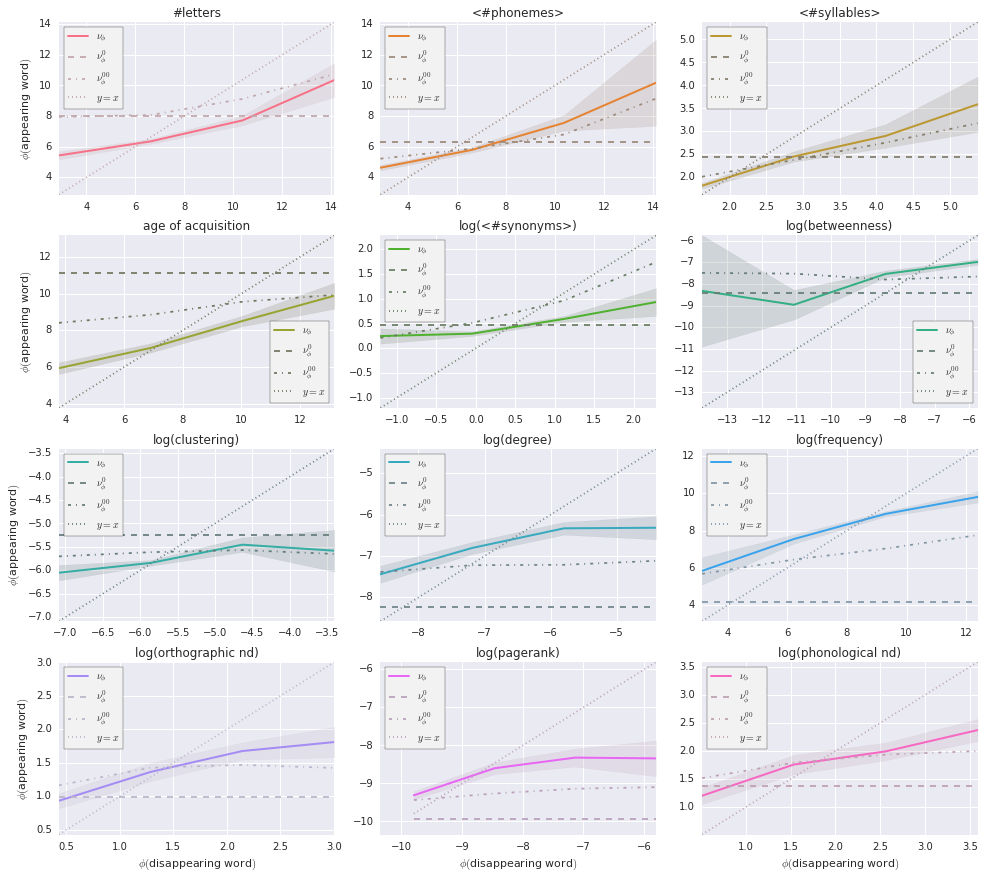

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

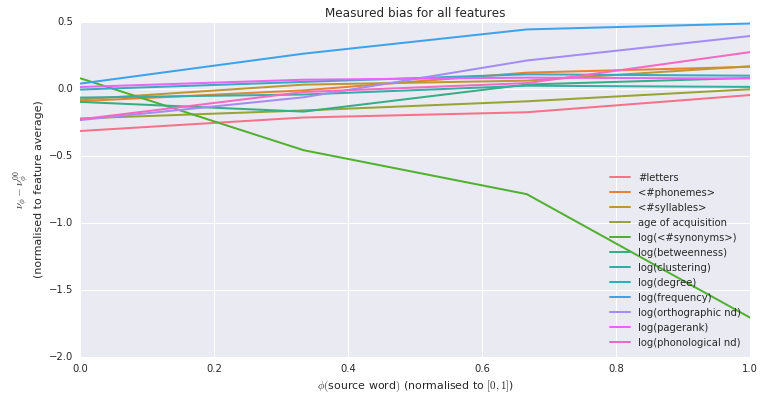

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |


H_00 | *** | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |
H_00 | *** | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | *** | *** | ns. |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | **  |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | ns. | **  | **  |


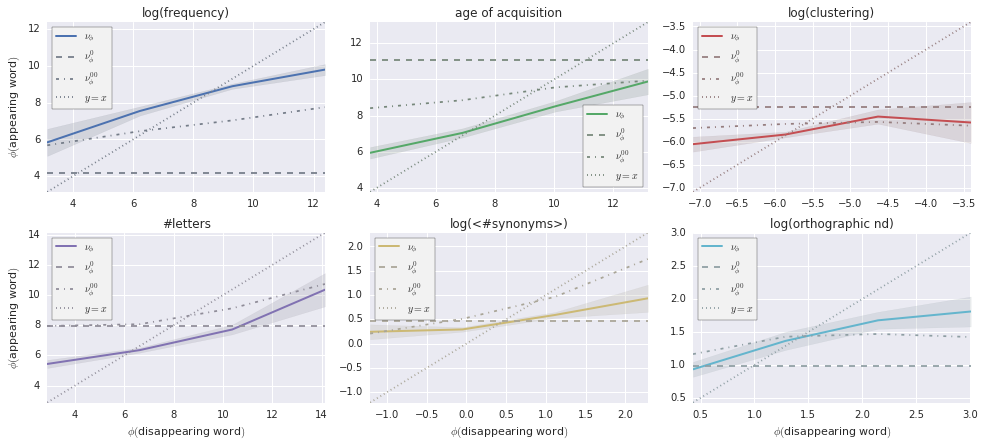

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

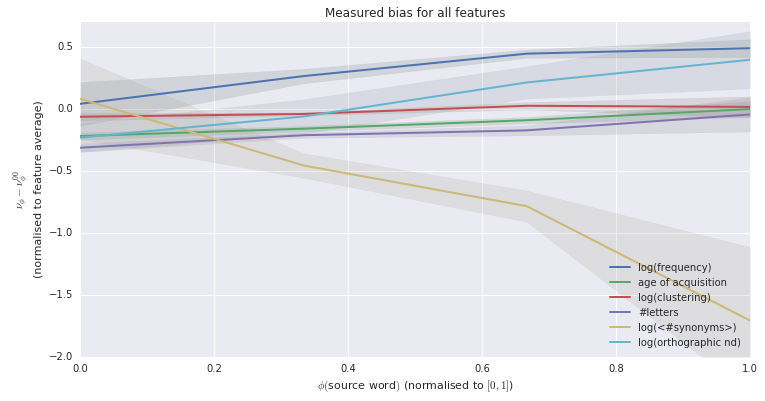

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | **  | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | *** | *** | *** |
H_00 | *** | *** | *   |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | **  | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |


H_00 | *** | *** | *** | *   |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | *   | *** | ns. | *** |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *   | *** | *** |



--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | **  | *** | *** |
H_00 | *** | ns. | ns. | *** |


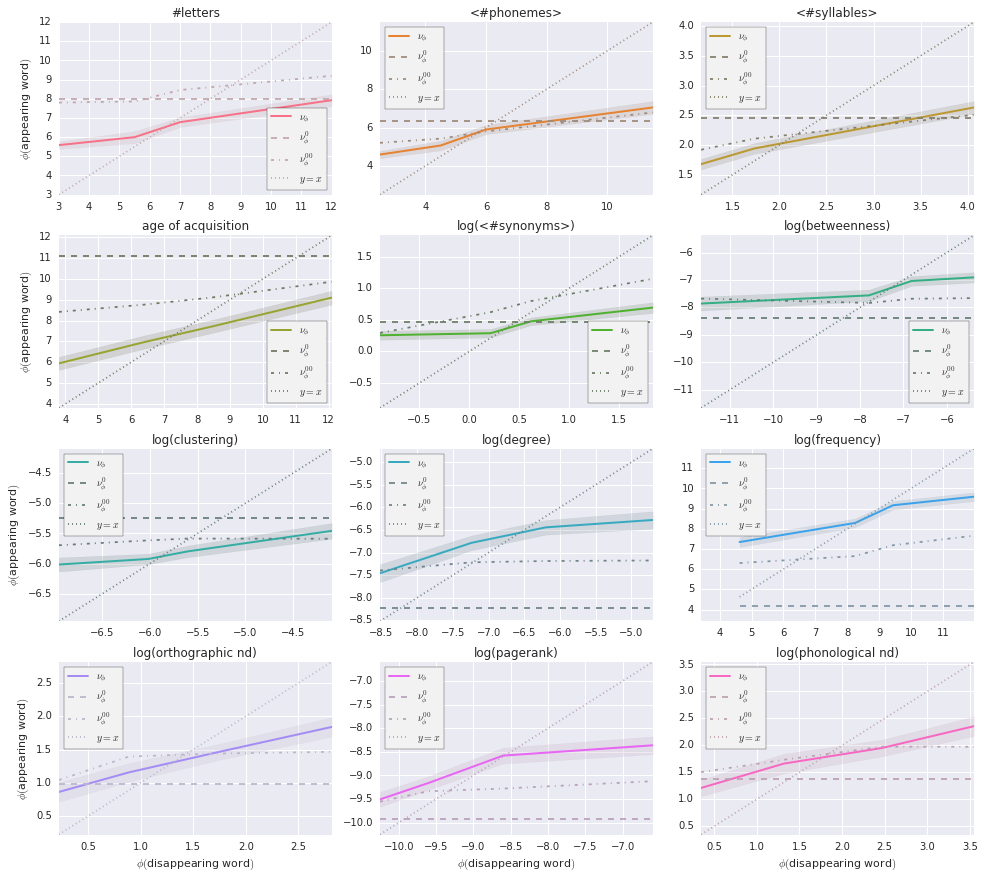

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

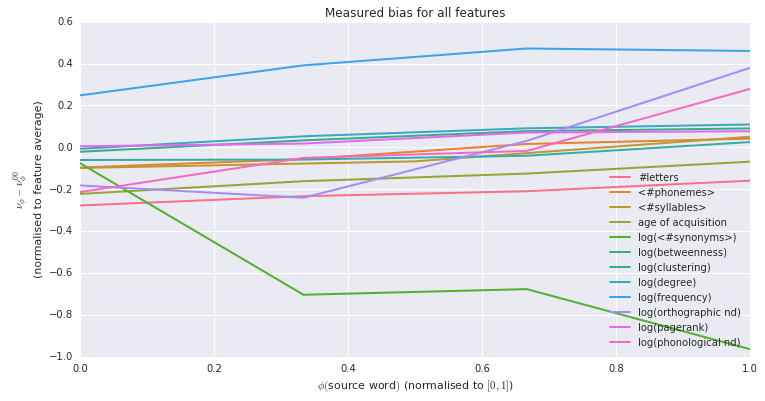

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | *   |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | *   | *** | ns. | *** |


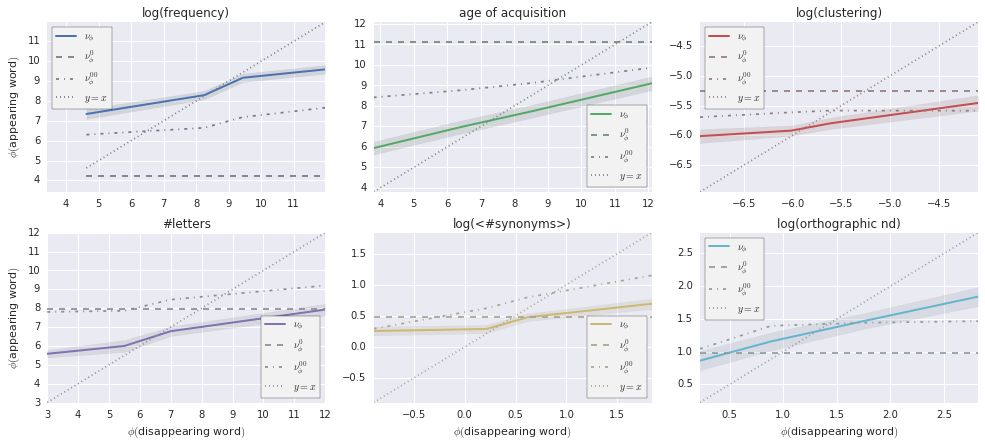

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

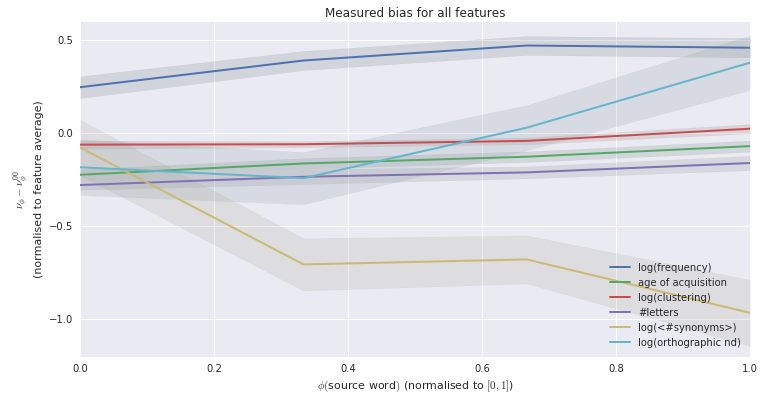

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | *** |
H_00 | *** | *   | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | ns. | *** |
H_00 | ns. | *** | ns. | **  |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | **  | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | *** | *   | *   |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | ns. | *** | *** |
H_00 | *   | **  | ns. | ns. |


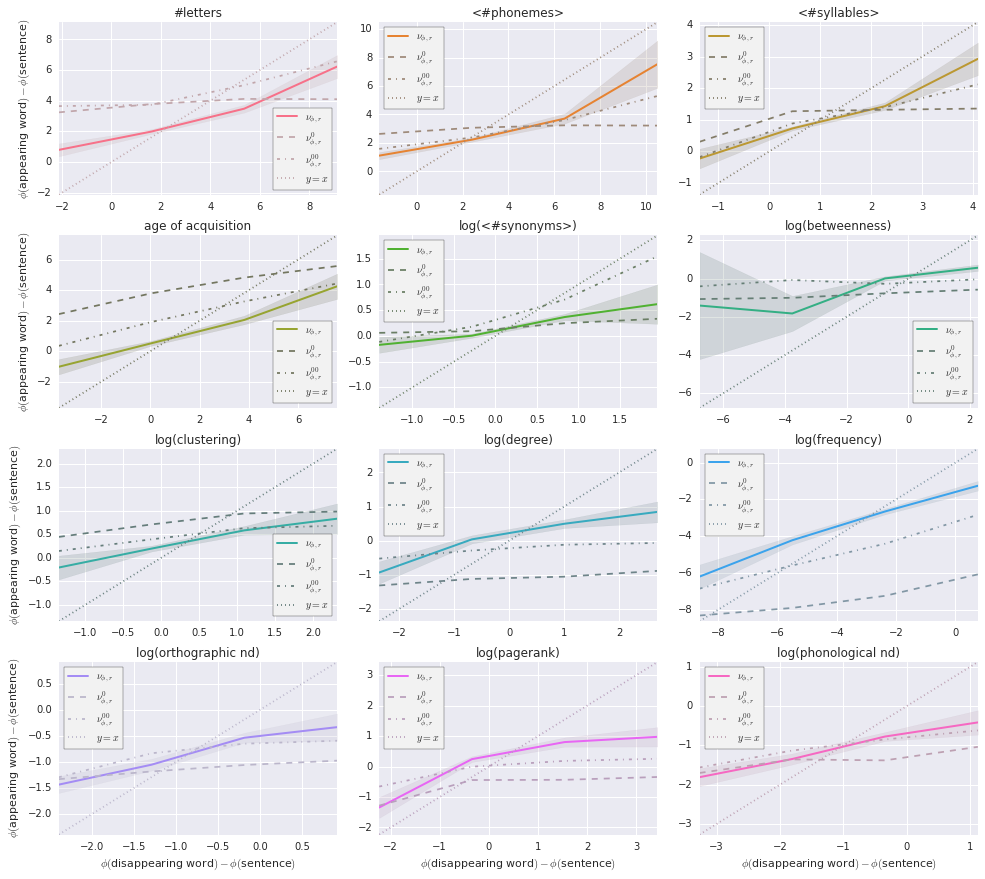

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

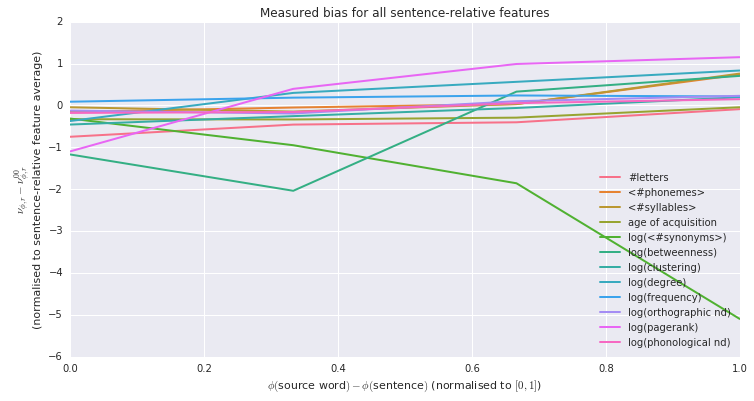

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | ns. |



----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |


H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | *** | *   | *   |


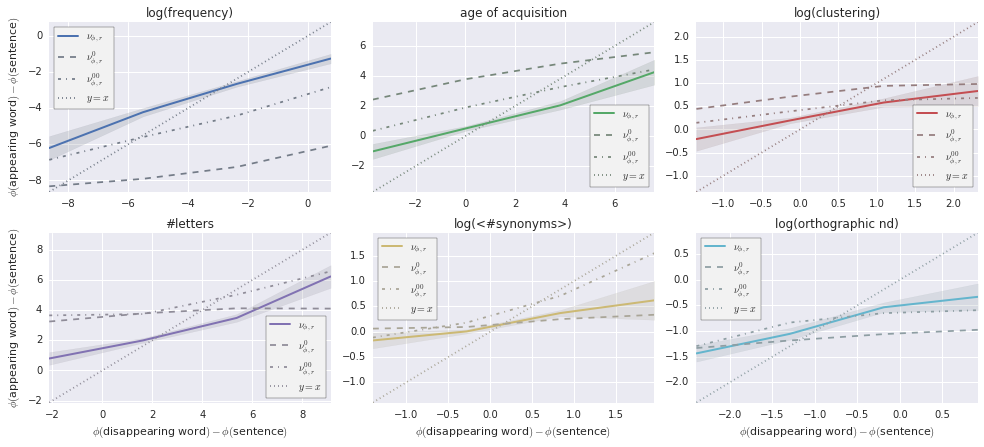

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

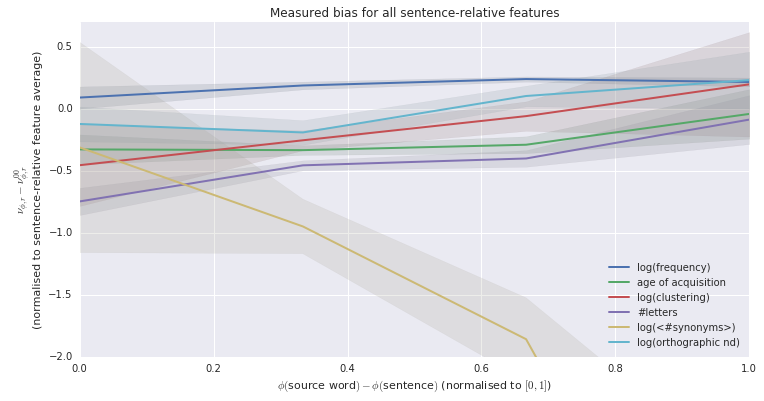

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *** |
H_00 | *** | **  | ns. | *   |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |
H_00 | *** | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | **  | **  | ns. | *** |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | **  | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | ns. | *** | *** |
H_00 | **  | *   | ns. | ns. |


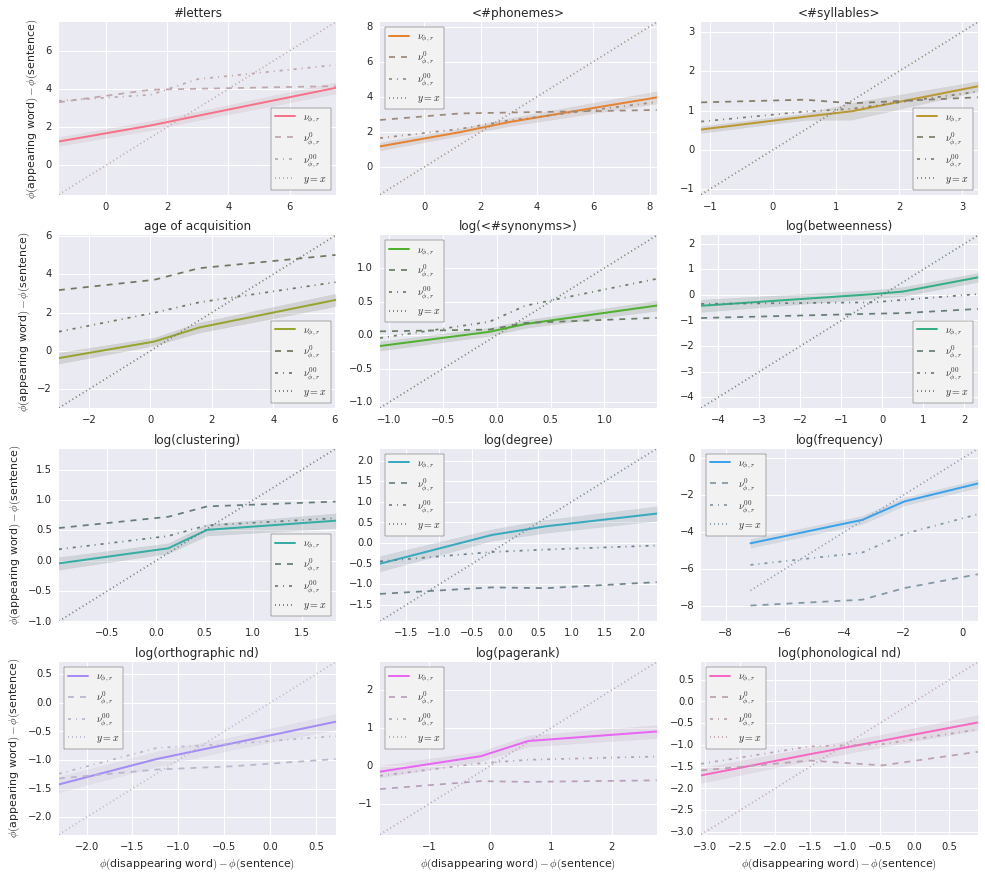

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

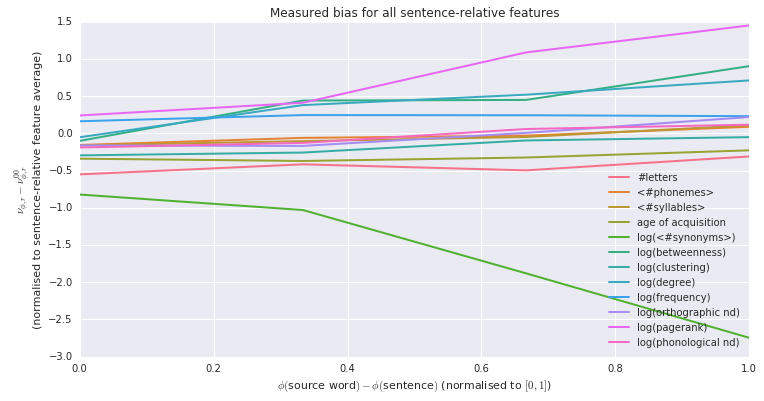

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | **  | **  | ns. | *** |


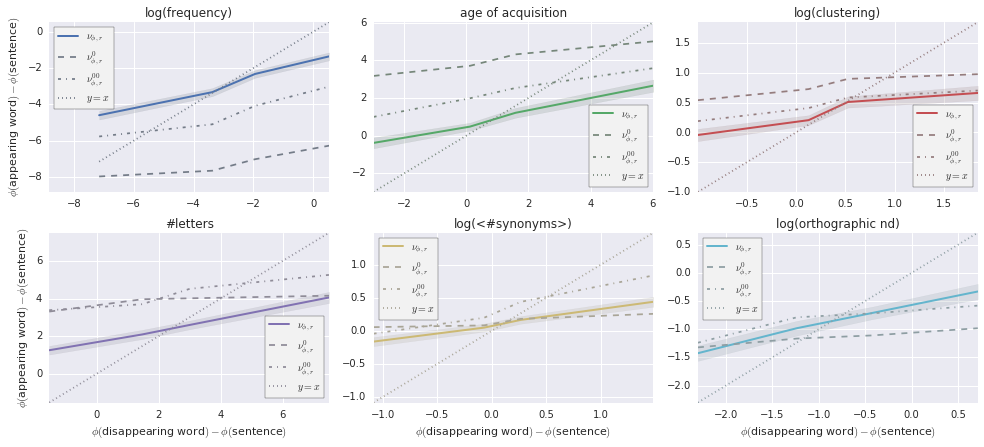

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

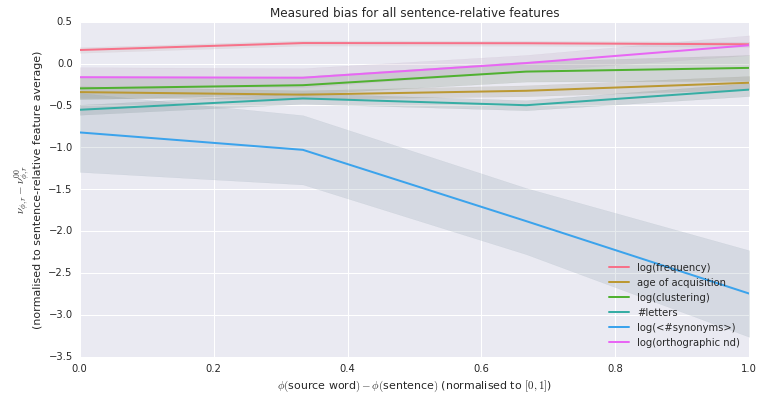

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


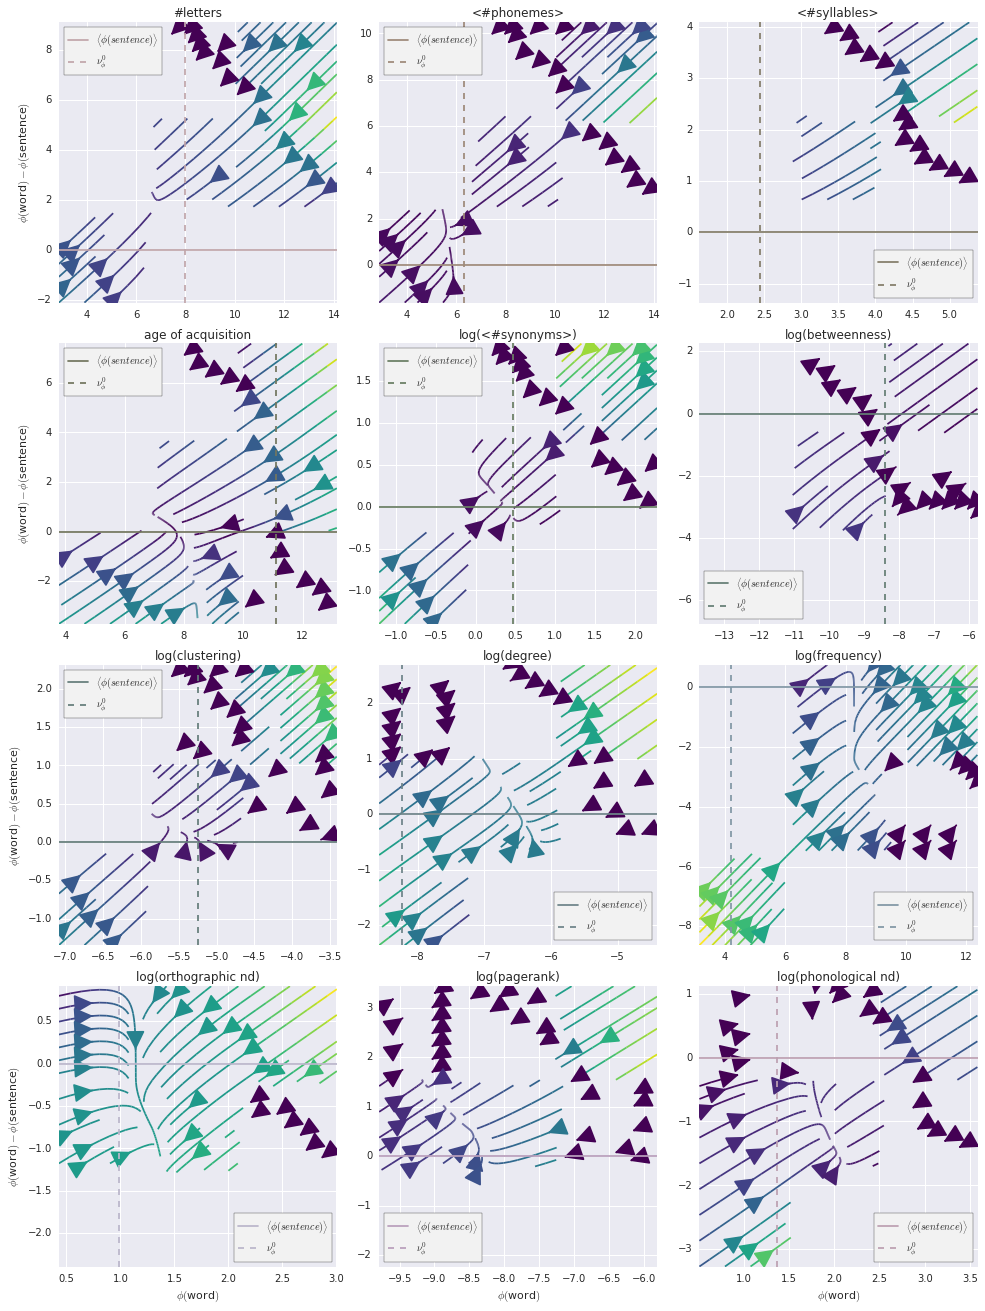

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


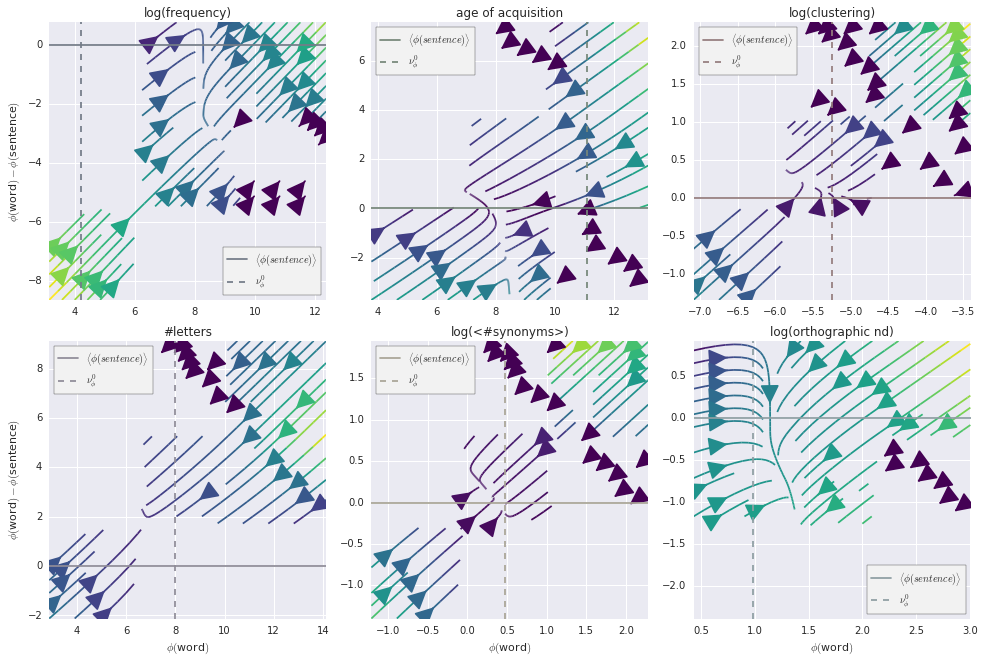

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.54701695  0.18174093  0.06961053  0.06644243  0.03297527  0.0300175
  0.01854228  0.01722637  0.01564068  0.00893736]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,0.506041,-0.253363,0.082770,-0.231941,-0.220781,0.437806,-0.206897,-0.265651,0.407437,-0.271662,0.159619,-0.001656
Component-1,-0.375107,0.365650,-0.133811,0.280493,0.261468,0.427307,-0.170193,0.277580,0.432662,-0.240732,0.163313,-0.014839
Component-2,0.447259,0.594408,-0.060312,0.227197,-0.544861,-0.080640,0.027687,0.287470,-0.001478,0.047139,-0.047293,-0.011835


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 11223) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    8 of 11223) |                    | Elapsed Time: 0:00:41 ETA: 16:02:58

  0% (   28 of 11223) |                     | Elapsed Time: 0:00:41 ETA: 4:36:04

  0% (   52 of 11223) |                     | Elapsed Time: 0:00:41 ETA: 2:29:04

  0% (   80 of 11223) |                     | Elapsed Time: 0:00:41 ETA: 1:37:08

  0% (  105 of 11223) |                     | Elapsed Time: 0:00:42 ETA: 0:01:41

  1% (  141 of 11223) |                     | Elapsed Time: 0:00:42 ETA: 0:01:35

  1% (  168 of 11223) |                     | Elapsed Time: 0:00:42 ETA: 0:01:29

  1% (  193 of 11223) |                     | Elapsed Time: 0:00:42 ETA: 0:01:30

  1% (  223 of 11223) |                     | Elapsed Time: 0:00:42 ETA: 0:01:28

  2% (  249 of 11223) |                     | Elapsed Time: 0:00:43 ETA: 0:01:27

  2% (  281 of 11223) |                     | Elapsed Time: 0:00:43 ETA: 0:01:22

  2% (  303 of 11223) |                     | Elapsed Time: 0:00:43 ETA: 0:01:26

  2% (  328 of 11223) |                     | Elapsed Time: 0:00:43 ETA: 0:01:29

  3% (  353 of 11223) |                     | Elapsed Time: 0:00:44 ETA: 0:01:29

  3% (  379 of 11223) |                     | Elapsed Time: 0:00:44 ETA: 0:01:31

  3% (  403 of 11223) |                     | Elapsed Time: 0:00:44 ETA: 0:01:31

  3% (  434 of 11223) |                     | Elapsed Time: 0:00:44 ETA: 0:01:29

  4% (  458 of 11223) |                     | Elapsed Time: 0:00:44 ETA: 0:01:29

  4% (  482 of 11223) |                     | Elapsed Time: 0:00:45 ETA: 0:01:30

  4% (  506 of 11223) |                     | Elapsed Time: 0:00:45 ETA: 0:01:30

  4% (  531 of 11223) |                     | Elapsed Time: 0:00:45 ETA: 0:01:30

  5% (  562 of 11223) |#                    | Elapsed Time: 0:00:45 ETA: 0:01:30

  5% (  583 of 11223) |#                    | Elapsed Time: 0:00:46 ETA: 0:01:34

  5% (  595 of 11223) |#                    | Elapsed Time: 0:00:46 ETA: 0:01:45

  5% (  622 of 11223) |#                    | Elapsed Time: 0:00:46 ETA: 0:01:42

  5% (  651 of 11223) |#                    | Elapsed Time: 0:00:46 ETA: 0:01:38

  6% (  679 of 11223) |#                    | Elapsed Time: 0:00:46 ETA: 0:01:35

  6% (  713 of 11223) |#                    | Elapsed Time: 0:00:47 ETA: 0:01:24

  6% (  733 of 11223) |#                    | Elapsed Time: 0:00:47 ETA: 0:01:25

  6% (  756 of 11223) |#                    | Elapsed Time: 0:00:47 ETA: 0:01:27

  6% (  782 of 11223) |#                    | Elapsed Time: 0:00:47 ETA: 0:01:29

  7% (  802 of 11223) |#                    | Elapsed Time: 0:00:47 ETA: 0:01:36

  7% (  824 of 11223) |#                    | Elapsed Time: 0:00:48 ETA: 0:01:36

  7% (  850 of 11223) |#                    | Elapsed Time: 0:00:48 ETA: 0:01:41

  7% (  868 of 11223) |#                    | Elapsed Time: 0:00:48 ETA: 0:01:47

  7% (  890 of 11223) |#                    | Elapsed Time: 0:00:48 ETA: 0:01:47

  8% (  912 of 11223) |#                    | Elapsed Time: 0:00:49 ETA: 0:01:47

  8% (  937 of 11223) |#                    | Elapsed Time: 0:00:49 ETA: 0:01:42

  8% (  962 of 11223) |#                    | Elapsed Time: 0:00:49 ETA: 0:01:30

  8% (  997 of 11223) |#                    | Elapsed Time: 0:00:49 ETA: 0:01:25

  9% ( 1029 of 11223) |#                    | Elapsed Time: 0:00:50 ETA: 0:01:18

  9% ( 1059 of 11223) |#                    | Elapsed Time: 0:00:50 ETA: 0:01:14

  9% ( 1082 of 11223) |##                   | Elapsed Time: 0:00:50 ETA: 0:01:15

  9% ( 1100 of 11223) |##                   | Elapsed Time: 0:00:50 ETA: 0:01:20

 10% ( 1123 of 11223) |##                   | Elapsed Time: 0:00:50 ETA: 0:01:29

 10% ( 1143 of 11223) |##                   | Elapsed Time: 0:00:51 ETA: 0:01:41

 10% ( 1166 of 11223) |##                   | Elapsed Time: 0:00:51 ETA: 0:01:44

 10% ( 1188 of 11223) |##                   | Elapsed Time: 0:00:51 ETA: 0:01:40

 10% ( 1213 of 11223) |##                   | Elapsed Time: 0:00:51 ETA: 0:01:34

 11% ( 1239 of 11223) |##                   | Elapsed Time: 0:00:51 ETA: 0:01:27

 11% ( 1278 of 11223) |##                   | Elapsed Time: 0:00:52 ETA: 0:01:19

 11% ( 1305 of 11223) |##                   | Elapsed Time: 0:00:52 ETA: 0:01:17

 11% ( 1323 of 11223) |##                   | Elapsed Time: 0:00:52 ETA: 0:01:20

 12% ( 1353 of 11223) |##                   | Elapsed Time: 0:00:52 ETA: 0:01:17

 12% ( 1381 of 11223) |##                   | Elapsed Time: 0:00:53 ETA: 0:01:18

 12% ( 1414 of 11223) |##                   | Elapsed Time: 0:00:53 ETA: 0:01:18

 12% ( 1438 of 11223) |##                   | Elapsed Time: 0:00:53 ETA: 0:01:16

 13% ( 1462 of 11223) |##                   | Elapsed Time: 0:00:53 ETA: 0:01:16

 13% ( 1489 of 11223) |##                   | Elapsed Time: 0:00:53 ETA: 0:01:19

 13% ( 1521 of 11223) |##                   | Elapsed Time: 0:00:54 ETA: 0:01:16

 13% ( 1558 of 11223) |##                   | Elapsed Time: 0:00:54 ETA: 0:01:13

 14% ( 1582 of 11223) |##                   | Elapsed Time: 0:00:54 ETA: 0:01:13

 14% ( 1606 of 11223) |###                  | Elapsed Time: 0:00:54 ETA: 0:01:14

 14% ( 1632 of 11223) |###                  | Elapsed Time: 0:00:55 ETA: 0:01:14

 14% ( 1657 of 11223) |###                  | Elapsed Time: 0:00:55 ETA: 0:01:19

 15% ( 1697 of 11223) |###                  | Elapsed Time: 0:00:55 ETA: 0:01:17

 15% ( 1722 of 11223) |###                  | Elapsed Time: 0:00:55 ETA: 0:01:16

 15% ( 1750 of 11223) |###                  | Elapsed Time: 0:00:55 ETA: 0:01:15

 15% ( 1773 of 11223) |###                  | Elapsed Time: 0:00:56 ETA: 0:01:15

 16% ( 1800 of 11223) |###                  | Elapsed Time: 0:00:56 ETA: 0:01:14

 16% ( 1824 of 11223) |###                  | Elapsed Time: 0:00:56 ETA: 0:01:19

 16% ( 1852 of 11223) |###                  | Elapsed Time: 0:00:56 ETA: 0:01:17

 16% ( 1878 of 11223) |###                  | Elapsed Time: 0:00:57 ETA: 0:01:18

 16% ( 1903 of 11223) |###                  | Elapsed Time: 0:00:57 ETA: 0:01:17

 17% ( 1930 of 11223) |###                  | Elapsed Time: 0:00:57 ETA: 0:01:14

 17% ( 1965 of 11223) |###                  | Elapsed Time: 0:00:57 ETA: 0:01:12

 17% ( 1993 of 11223) |###                  | Elapsed Time: 0:00:57 ETA: 0:01:11

 17% ( 2019 of 11223) |###                  | Elapsed Time: 0:00:58 ETA: 0:01:12

 18% ( 2053 of 11223) |###                  | Elapsed Time: 0:00:58 ETA: 0:01:06

 18% ( 2081 of 11223) |###                  | Elapsed Time: 0:00:58 ETA: 0:01:06

 18% ( 2119 of 11223) |###                  | Elapsed Time: 0:00:58 ETA: 0:01:06

 19% ( 2146 of 11223) |####                 | Elapsed Time: 0:00:59 ETA: 0:01:06

 19% ( 2174 of 11223) |####                 | Elapsed Time: 0:00:59 ETA: 0:01:06

 19% ( 2199 of 11223) |####                 | Elapsed Time: 0:00:59 ETA: 0:01:09

 19% ( 2219 of 11223) |####                 | Elapsed Time: 0:00:59 ETA: 0:01:13

 20% ( 2245 of 11223) |####                 | Elapsed Time: 0:00:59 ETA: 0:01:20

 20% ( 2271 of 11223) |####                 | Elapsed Time: 0:01:00 ETA: 0:01:21

 20% ( 2291 of 11223) |####                 | Elapsed Time: 0:01:00 ETA: 0:01:23

 20% ( 2316 of 11223) |####                 | Elapsed Time: 0:01:00 ETA: 0:01:25

 20% ( 2354 of 11223) |####                 | Elapsed Time: 0:01:00 ETA: 0:01:17

 21% ( 2385 of 11223) |####                 | Elapsed Time: 0:01:01 ETA: 0:01:16

 21% ( 2407 of 11223) |####                 | Elapsed Time: 0:01:01 ETA: 0:01:14

 21% ( 2433 of 11223) |####                 | Elapsed Time: 0:01:01 ETA: 0:01:12

 21% ( 2449 of 11223) |####                 | Elapsed Time: 0:01:01 ETA: 0:01:19

 22% ( 2477 of 11223) |####                 | Elapsed Time: 0:01:01 ETA: 0:01:17

 22% ( 2502 of 11223) |####                 | Elapsed Time: 0:01:02 ETA: 0:01:16

 22% ( 2543 of 11223) |####                 | Elapsed Time: 0:01:02 ETA: 0:01:12

 22% ( 2572 of 11223) |####                 | Elapsed Time: 0:01:02 ETA: 0:01:04

 23% ( 2600 of 11223) |####                 | Elapsed Time: 0:01:02 ETA: 0:01:03

 23% ( 2630 of 11223) |####                 | Elapsed Time: 0:01:03 ETA: 0:01:01

 23% ( 2666 of 11223) |####                 | Elapsed Time: 0:01:03 ETA: 0:01:01

 23% ( 2686 of 11223) |#####                | Elapsed Time: 0:01:03 ETA: 0:01:08

 24% ( 2721 of 11223) |#####                | Elapsed Time: 0:01:03 ETA: 0:01:04

 24% ( 2749 of 11223) |#####                | Elapsed Time: 0:01:03 ETA: 0:01:03

 24% ( 2776 of 11223) |#####                | Elapsed Time: 0:01:04 ETA: 0:01:04

 25% ( 2806 of 11223) |#####                | Elapsed Time: 0:01:04 ETA: 0:01:02

 25% ( 2822 of 11223) |#####                | Elapsed Time: 0:01:04 ETA: 0:01:10

 25% ( 2844 of 11223) |#####                | Elapsed Time: 0:01:04 ETA: 0:01:17

 25% ( 2868 of 11223) |#####                | Elapsed Time: 0:01:05 ETA: 0:01:19

 25% ( 2897 of 11223) |#####                | Elapsed Time: 0:01:05 ETA: 0:01:17

 26% ( 2925 of 11223) |#####                | Elapsed Time: 0:01:05 ETA: 0:01:09

 26% ( 2962 of 11223) |#####                | Elapsed Time: 0:01:05 ETA: 0:01:01

 26% ( 2992 of 11223) |#####                | Elapsed Time: 0:01:05 ETA: 0:00:58

 26% ( 3024 of 11223) |#####                | Elapsed Time: 0:01:06 ETA: 0:00:56

 27% ( 3054 of 11223) |#####                | Elapsed Time: 0:01:06 ETA: 0:00:55

 27% ( 3087 of 11223) |#####                | Elapsed Time: 0:01:06 ETA: 0:00:56

 27% ( 3113 of 11223) |#####                | Elapsed Time: 0:01:06 ETA: 0:00:59

 27% ( 3134 of 11223) |#####                | Elapsed Time: 0:01:07 ETA: 0:01:03

 28% ( 3153 of 11223) |#####                | Elapsed Time: 0:01:07 ETA: 0:01:11

 28% ( 3181 of 11223) |#####                | Elapsed Time: 0:01:07 ETA: 0:01:11

 28% ( 3209 of 11223) |######               | Elapsed Time: 0:01:07 ETA: 0:01:09

 28% ( 3242 of 11223) |######               | Elapsed Time: 0:01:07 ETA: 0:01:09

 29% ( 3271 of 11223) |######               | Elapsed Time: 0:01:08 ETA: 0:01:00

 29% ( 3299 of 11223) |######               | Elapsed Time: 0:01:08 ETA: 0:00:59

 29% ( 3321 of 11223) |######               | Elapsed Time: 0:01:08 ETA: 0:01:02

 29% ( 3346 of 11223) |######               | Elapsed Time: 0:01:08 ETA: 0:01:01

 30% ( 3380 of 11223) |######               | Elapsed Time: 0:01:09 ETA: 0:01:02

 30% ( 3404 of 11223) |######               | Elapsed Time: 0:01:09 ETA: 0:01:06

 30% ( 3421 of 11223) |######               | Elapsed Time: 0:01:09 ETA: 0:01:10

 30% ( 3448 of 11223) |######               | Elapsed Time: 0:01:09 ETA: 0:01:06

 30% ( 3477 of 11223) |######               | Elapsed Time: 0:01:09 ETA: 0:01:05

 31% ( 3508 of 11223) |######               | Elapsed Time: 0:01:10 ETA: 0:01:05

 31% ( 3531 of 11223) |######               | Elapsed Time: 0:01:10 ETA: 0:01:04

 31% ( 3556 of 11223) |######               | Elapsed Time: 0:01:10 ETA: 0:01:00

 31% ( 3581 of 11223) |######               | Elapsed Time: 0:01:10 ETA: 0:01:03

 32% ( 3607 of 11223) |######               | Elapsed Time: 0:01:10 ETA: 0:01:04

 32% ( 3634 of 11223) |######               | Elapsed Time: 0:01:11 ETA: 0:01:01

 32% ( 3661 of 11223) |######               | Elapsed Time: 0:01:11 ETA: 0:01:01

 32% ( 3681 of 11223) |######               | Elapsed Time: 0:01:11 ETA: 0:01:03

 32% ( 3702 of 11223) |######               | Elapsed Time: 0:01:11 ETA: 0:01:05

 33% ( 3729 of 11223) |######               | Elapsed Time: 0:01:12 ETA: 0:01:05

 33% ( 3755 of 11223) |#######              | Elapsed Time: 0:01:12 ETA: 0:01:05

 33% ( 3779 of 11223) |#######              | Elapsed Time: 0:01:12 ETA: 0:01:05

 33% ( 3800 of 11223) |#######              | Elapsed Time: 0:01:12 ETA: 0:01:05

 34% ( 3824 of 11223) |#######              | Elapsed Time: 0:01:12 ETA: 0:01:03

 34% ( 3851 of 11223) |#######              | Elapsed Time: 0:01:13 ETA: 0:01:02

 34% ( 3880 of 11223) |#######              | Elapsed Time: 0:01:13 ETA: 0:01:01

 34% ( 3908 of 11223) |#######              | Elapsed Time: 0:01:13 ETA: 0:00:58

 35% ( 3929 of 11223) |#######              | Elapsed Time: 0:01:13 ETA: 0:00:58

 35% ( 3953 of 11223) |#######              | Elapsed Time: 0:01:13 ETA: 0:00:59

 35% ( 3975 of 11223) |#######              | Elapsed Time: 0:01:14 ETA: 0:01:02

 35% ( 4004 of 11223) |#######              | Elapsed Time: 0:01:14 ETA: 0:01:02

 35% ( 4034 of 11223) |#######              | Elapsed Time: 0:01:14 ETA: 0:00:58

 36% ( 4069 of 11223) |#######              | Elapsed Time: 0:01:14 ETA: 0:00:54

 36% ( 4095 of 11223) |#######              | Elapsed Time: 0:01:14 ETA: 0:00:54

 36% ( 4121 of 11223) |#######              | Elapsed Time: 0:01:15 ETA: 0:00:52

 36% ( 4151 of 11223) |#######              | Elapsed Time: 0:01:15 ETA: 0:00:53

 37% ( 4174 of 11223) |#######              | Elapsed Time: 0:01:15 ETA: 0:00:56

 37% ( 4189 of 11223) |#######              | Elapsed Time: 0:01:15 ETA: 0:01:03

 37% ( 4201 of 11223) |#######              | Elapsed Time: 0:01:16 ETA: 0:01:12

 37% ( 4215 of 11223) |#######              | Elapsed Time: 0:01:16 ETA: 0:01:25

 37% ( 4230 of 11223) |#######              | Elapsed Time: 0:01:16 ETA: 0:01:38

 37% ( 4250 of 11223) |#######              | Elapsed Time: 0:01:16 ETA: 0:01:39

 38% ( 4274 of 11223) |#######              | Elapsed Time: 0:01:16 ETA: 0:01:24

 38% ( 4300 of 11223) |########             | Elapsed Time: 0:01:17 ETA: 0:01:12

 38% ( 4324 of 11223) |########             | Elapsed Time: 0:01:17 ETA: 0:01:03

 38% ( 4349 of 11223) |########             | Elapsed Time: 0:01:17 ETA: 0:01:00

 39% ( 4380 of 11223) |########             | Elapsed Time: 0:01:17 ETA: 0:00:55

 39% ( 4397 of 11223) |########             | Elapsed Time: 0:01:17 ETA: 0:01:01

 39% ( 4410 of 11223) |########             | Elapsed Time: 0:01:18 ETA: 0:01:07

 39% ( 4436 of 11223) |########             | Elapsed Time: 0:01:18 ETA: 0:01:04

 39% ( 4460 of 11223) |########             | Elapsed Time: 0:01:18 ETA: 0:01:06

 40% ( 4490 of 11223) |########             | Elapsed Time: 0:01:18 ETA: 0:01:06

 40% ( 4515 of 11223) |########             | Elapsed Time: 0:01:19 ETA: 0:00:59

 40% ( 4539 of 11223) |########             | Elapsed Time: 0:01:19 ETA: 0:00:55

 40% ( 4568 of 11223) |########             | Elapsed Time: 0:01:19 ETA: 0:00:55

 40% ( 4595 of 11223) |########             | Elapsed Time: 0:01:19 ETA: 0:00:51

 41% ( 4630 of 11223) |########             | Elapsed Time: 0:01:19 ETA: 0:00:54

 41% ( 4661 of 11223) |########             | Elapsed Time: 0:01:20 ETA: 0:00:50

 41% ( 4690 of 11223) |########             | Elapsed Time: 0:01:20 ETA: 0:00:49

 41% ( 4710 of 11223) |########             | Elapsed Time: 0:01:20 ETA: 0:00:52

 42% ( 4725 of 11223) |########             | Elapsed Time: 0:01:20 ETA: 0:00:58

 42% ( 4751 of 11223) |########             | Elapsed Time: 0:01:21 ETA: 0:00:59

 42% ( 4783 of 11223) |########             | Elapsed Time: 0:01:21 ETA: 0:00:58

 42% ( 4809 of 11223) |########             | Elapsed Time: 0:01:21 ETA: 0:00:58

 43% ( 4827 of 11223) |#########            | Elapsed Time: 0:01:21 ETA: 0:00:57

 43% ( 4848 of 11223) |#########            | Elapsed Time: 0:01:21 ETA: 0:00:55

 43% ( 4870 of 11223) |#########            | Elapsed Time: 0:01:22 ETA: 0:00:59

 43% ( 4911 of 11223) |#########            | Elapsed Time: 0:01:22 ETA: 0:00:59

 43% ( 4938 of 11223) |#########            | Elapsed Time: 0:01:22 ETA: 0:00:54

 44% ( 4961 of 11223) |#########            | Elapsed Time: 0:01:22 ETA: 0:00:52

 44% ( 4984 of 11223) |#########            | Elapsed Time: 0:01:23 ETA: 0:00:51

 44% ( 5008 of 11223) |#########            | Elapsed Time: 0:01:23 ETA: 0:00:51

 44% ( 5029 of 11223) |#########            | Elapsed Time: 0:01:23 ETA: 0:00:57

 45% ( 5065 of 11223) |#########            | Elapsed Time: 0:01:23 ETA: 0:00:54

 45% ( 5092 of 11223) |#########            | Elapsed Time: 0:01:23 ETA: 0:00:52

 45% ( 5108 of 11223) |#########            | Elapsed Time: 0:01:24 ETA: 0:00:56

 45% ( 5120 of 11223) |#########            | Elapsed Time: 0:01:24 ETA: 0:01:03

 45% ( 5137 of 11223) |#########            | Elapsed Time: 0:01:24 ETA: 0:01:06

 46% ( 5163 of 11223) |#########            | Elapsed Time: 0:01:24 ETA: 0:01:12

 46% ( 5191 of 11223) |#########            | Elapsed Time: 0:01:25 ETA: 0:01:04

 46% ( 5215 of 11223) |#########            | Elapsed Time: 0:01:25 ETA: 0:00:58

 46% ( 5244 of 11223) |#########            | Elapsed Time: 0:01:25 ETA: 0:00:48

 46% ( 5270 of 11223) |#########            | Elapsed Time: 0:01:25 ETA: 0:00:47

 47% ( 5293 of 11223) |#########            | Elapsed Time: 0:01:25 ETA: 0:00:48

 47% ( 5331 of 11223) |#########            | Elapsed Time: 0:01:26 ETA: 0:00:46

 47% ( 5356 of 11223) |##########           | Elapsed Time: 0:01:26 ETA: 0:00:46

 47% ( 5381 of 11223) |##########           | Elapsed Time: 0:01:26 ETA: 0:00:47

 48% ( 5408 of 11223) |##########           | Elapsed Time: 0:01:26 ETA: 0:00:46

 48% ( 5440 of 11223) |##########           | Elapsed Time: 0:01:27 ETA: 0:00:44

 48% ( 5472 of 11223) |##########           | Elapsed Time: 0:01:27 ETA: 0:00:42

 48% ( 5495 of 11223) |##########           | Elapsed Time: 0:01:27 ETA: 0:00:43

 49% ( 5515 of 11223) |##########           | Elapsed Time: 0:01:27 ETA: 0:00:43

 49% ( 5537 of 11223) |##########           | Elapsed Time: 0:01:27 ETA: 0:00:47

 49% ( 5558 of 11223) |##########           | Elapsed Time: 0:01:28 ETA: 0:00:52

 49% ( 5586 of 11223) |##########           | Elapsed Time: 0:01:28 ETA: 0:00:49

 50% ( 5612 of 11223) |##########           | Elapsed Time: 0:01:28 ETA: 0:00:51

 50% ( 5645 of 11223) |##########           | Elapsed Time: 0:01:28 ETA: 0:00:44

 50% ( 5677 of 11223) |##########           | Elapsed Time: 0:01:28 ETA: 0:00:41

 50% ( 5702 of 11223) |##########           | Elapsed Time: 0:01:29 ETA: 0:00:39

 51% ( 5727 of 11223) |##########           | Elapsed Time: 0:01:29 ETA: 0:00:40

 51% ( 5759 of 11223) |##########           | Elapsed Time: 0:01:29 ETA: 0:00:43

 51% ( 5787 of 11223) |##########           | Elapsed Time: 0:01:29 ETA: 0:00:45

 51% ( 5818 of 11223) |##########           | Elapsed Time: 0:01:30 ETA: 0:00:44

 51% ( 5833 of 11223) |##########           | Elapsed Time: 0:01:30 ETA: 0:00:48

 52% ( 5866 of 11223) |##########           | Elapsed Time: 0:01:30 ETA: 0:00:45

 52% ( 5909 of 11223) |###########          | Elapsed Time: 0:01:30 ETA: 0:00:40

 52% ( 5929 of 11223) |###########          | Elapsed Time: 0:01:31 ETA: 0:00:44

 52% ( 5939 of 11223) |###########          | Elapsed Time: 0:01:31 ETA: 0:00:47

 53% ( 5952 of 11223) |###########          | Elapsed Time: 0:01:31 ETA: 0:00:51

 53% ( 5973 of 11223) |###########          | Elapsed Time: 0:01:31 ETA: 0:01:00

 53% ( 5988 of 11223) |###########          | Elapsed Time: 0:01:31 ETA: 0:01:18

 53% ( 6017 of 11223) |###########          | Elapsed Time: 0:01:32 ETA: 0:01:00

 53% ( 6045 of 11223) |###########          | Elapsed Time: 0:01:32 ETA: 0:00:49

 54% ( 6075 of 11223) |###########          | Elapsed Time: 0:01:32 ETA: 0:00:44

 54% ( 6102 of 11223) |###########          | Elapsed Time: 0:01:32 ETA: 0:00:39

 54% ( 6121 of 11223) |###########          | Elapsed Time: 0:01:32 ETA: 0:00:41

 54% ( 6144 of 11223) |###########          | Elapsed Time: 0:01:33 ETA: 0:00:44

 55% ( 6173 of 11223) |###########          | Elapsed Time: 0:01:33 ETA: 0:00:46

 55% ( 6199 of 11223) |###########          | Elapsed Time: 0:01:33 ETA: 0:00:48

 55% ( 6217 of 11223) |###########          | Elapsed Time: 0:01:33 ETA: 0:00:51

 55% ( 6237 of 11223) |###########          | Elapsed Time: 0:01:34 ETA: 0:00:49

 55% ( 6266 of 11223) |###########          | Elapsed Time: 0:01:34 ETA: 0:00:47

 56% ( 6293 of 11223) |###########          | Elapsed Time: 0:01:34 ETA: 0:00:42

 56% ( 6329 of 11223) |###########          | Elapsed Time: 0:01:34 ETA: 0:00:40

 56% ( 6360 of 11223) |###########          | Elapsed Time: 0:01:34 ETA: 0:00:34

 56% ( 6387 of 11223) |###########          | Elapsed Time: 0:01:35 ETA: 0:00:34

 57% ( 6412 of 11223) |###########          | Elapsed Time: 0:01:35 ETA: 0:00:35

 57% ( 6435 of 11223) |############         | Elapsed Time: 0:01:35 ETA: 0:00:36

 57% ( 6463 of 11223) |############         | Elapsed Time: 0:01:35 ETA: 0:00:41

 57% ( 6489 of 11223) |############         | Elapsed Time: 0:01:36 ETA: 0:00:40

 58% ( 6519 of 11223) |############         | Elapsed Time: 0:01:36 ETA: 0:00:40

 58% ( 6542 of 11223) |############         | Elapsed Time: 0:01:36 ETA: 0:00:41

 58% ( 6564 of 11223) |############         | Elapsed Time: 0:01:36 ETA: 0:00:41

 58% ( 6594 of 11223) |############         | Elapsed Time: 0:01:36 ETA: 0:00:38

 59% ( 6623 of 11223) |############         | Elapsed Time: 0:01:37 ETA: 0:00:36

 59% ( 6648 of 11223) |############         | Elapsed Time: 0:01:37 ETA: 0:00:37

 59% ( 6675 of 11223) |############         | Elapsed Time: 0:01:37 ETA: 0:00:35

 59% ( 6692 of 11223) |############         | Elapsed Time: 0:01:37 ETA: 0:00:36

 59% ( 6718 of 11223) |############         | Elapsed Time: 0:01:37 ETA: 0:00:39

 60% ( 6748 of 11223) |############         | Elapsed Time: 0:01:38 ETA: 0:00:38

 60% ( 6776 of 11223) |############         | Elapsed Time: 0:01:38 ETA: 0:00:37

 60% ( 6804 of 11223) |############         | Elapsed Time: 0:01:38 ETA: 0:00:35

 60% ( 6830 of 11223) |############         | Elapsed Time: 0:01:38 ETA: 0:00:33

 61% ( 6854 of 11223) |############         | Elapsed Time: 0:01:39 ETA: 0:00:33

 61% ( 6888 of 11223) |############         | Elapsed Time: 0:01:39 ETA: 0:00:34

 61% ( 6906 of 11223) |############         | Elapsed Time: 0:01:39 ETA: 0:00:37

 61% ( 6928 of 11223) |############         | Elapsed Time: 0:01:39 ETA: 0:00:40

 61% ( 6948 of 11223) |#############        | Elapsed Time: 0:01:39 ETA: 0:00:42

 62% ( 6970 of 11223) |#############        | Elapsed Time: 0:01:40 ETA: 0:00:42

 62% ( 7001 of 11223) |#############        | Elapsed Time: 0:01:40 ETA: 0:00:37

 62% ( 7029 of 11223) |#############        | Elapsed Time: 0:01:40 ETA: 0:00:35

 62% ( 7056 of 11223) |#############        | Elapsed Time: 0:01:40 ETA: 0:00:33

 63% ( 7082 of 11223) |#############        | Elapsed Time: 0:01:40 ETA: 0:00:31

 63% ( 7110 of 11223) |#############        | Elapsed Time: 0:01:41 ETA: 0:00:31

 63% ( 7141 of 11223) |#############        | Elapsed Time: 0:01:41 ETA: 0:00:30

 63% ( 7167 of 11223) |#############        | Elapsed Time: 0:01:41 ETA: 0:00:31

 64% ( 7197 of 11223) |#############        | Elapsed Time: 0:01:41 ETA: 0:00:29

 64% ( 7222 of 11223) |#############        | Elapsed Time: 0:01:42 ETA: 0:00:29

 64% ( 7247 of 11223) |#############        | Elapsed Time: 0:01:42 ETA: 0:00:30

 64% ( 7269 of 11223) |#############        | Elapsed Time: 0:01:42 ETA: 0:00:32

 65% ( 7295 of 11223) |#############        | Elapsed Time: 0:01:42 ETA: 0:00:32

 65% ( 7324 of 11223) |#############        | Elapsed Time: 0:01:42 ETA: 0:00:32

 65% ( 7357 of 11223) |#############        | Elapsed Time: 0:01:43 ETA: 0:00:30

 65% ( 7384 of 11223) |#############        | Elapsed Time: 0:01:43 ETA: 0:00:28

 66% ( 7413 of 11223) |#############        | Elapsed Time: 0:01:43 ETA: 0:00:27

 66% ( 7450 of 11223) |#############        | Elapsed Time: 0:01:43 ETA: 0:00:26

 66% ( 7474 of 11223) |#############        | Elapsed Time: 0:01:44 ETA: 0:00:28

 66% ( 7505 of 11223) |##############       | Elapsed Time: 0:01:44 ETA: 0:00:28

 67% ( 7533 of 11223) |##############       | Elapsed Time: 0:01:44 ETA: 0:00:27

 67% ( 7560 of 11223) |##############       | Elapsed Time: 0:01:44 ETA: 0:00:28

 67% ( 7592 of 11223) |##############       | Elapsed Time: 0:01:44 ETA: 0:00:26

 67% ( 7619 of 11223) |##############       | Elapsed Time: 0:01:45 ETA: 0:00:26

 68% ( 7648 of 11223) |##############       | Elapsed Time: 0:01:45 ETA: 0:00:26

 68% ( 7679 of 11223) |##############       | Elapsed Time: 0:01:45 ETA: 0:00:25

 68% ( 7716 of 11223) |##############       | Elapsed Time: 0:01:45 ETA: 0:00:24

 69% ( 7748 of 11223) |##############       | Elapsed Time: 0:01:45 ETA: 0:00:23

 69% ( 7777 of 11223) |##############       | Elapsed Time: 0:01:46 ETA: 0:00:24

 69% ( 7808 of 11223) |##############       | Elapsed Time: 0:01:46 ETA: 0:00:23

 69% ( 7827 of 11223) |##############       | Elapsed Time: 0:01:46 ETA: 0:00:25

 70% ( 7871 of 11223) |##############       | Elapsed Time: 0:01:46 ETA: 0:00:25

 70% ( 7897 of 11223) |##############       | Elapsed Time: 0:01:47 ETA: 0:00:25

 70% ( 7920 of 11223) |##############       | Elapsed Time: 0:01:47 ETA: 0:00:26

 70% ( 7936 of 11223) |##############       | Elapsed Time: 0:01:47 ETA: 0:00:28

 70% ( 7960 of 11223) |##############       | Elapsed Time: 0:01:47 ETA: 0:00:28

 71% ( 7997 of 11223) |##############       | Elapsed Time: 0:01:47 ETA: 0:00:27

 71% ( 8026 of 11223) |###############      | Elapsed Time: 0:01:48 ETA: 0:00:27

 71% ( 8055 of 11223) |###############      | Elapsed Time: 0:01:48 ETA: 0:00:24

 72% ( 8083 of 11223) |###############      | Elapsed Time: 0:01:48 ETA: 0:00:22

 72% ( 8112 of 11223) |###############      | Elapsed Time: 0:01:48 ETA: 0:00:22

 72% ( 8137 of 11223) |###############      | Elapsed Time: 0:01:49 ETA: 0:00:23

 72% ( 8165 of 11223) |###############      | Elapsed Time: 0:01:49 ETA: 0:00:23

 72% ( 8191 of 11223) |###############      | Elapsed Time: 0:01:49 ETA: 0:00:23

 73% ( 8214 of 11223) |###############      | Elapsed Time: 0:01:49 ETA: 0:00:25

 73% ( 8236 of 11223) |###############      | Elapsed Time: 0:01:49 ETA: 0:00:25

 73% ( 8256 of 11223) |###############      | Elapsed Time: 0:01:50 ETA: 0:00:26

 73% ( 8292 of 11223) |###############      | Elapsed Time: 0:01:50 ETA: 0:00:25

 74% ( 8323 of 11223) |###############      | Elapsed Time: 0:01:50 ETA: 0:00:24

 74% ( 8352 of 11223) |###############      | Elapsed Time: 0:01:50 ETA: 0:00:22

 74% ( 8379 of 11223) |###############      | Elapsed Time: 0:01:50 ETA: 0:00:21

 75% ( 8418 of 11223) |###############      | Elapsed Time: 0:01:51 ETA: 0:00:19

 75% ( 8443 of 11223) |###############      | Elapsed Time: 0:01:51 ETA: 0:00:20

 75% ( 8473 of 11223) |###############      | Elapsed Time: 0:01:51 ETA: 0:00:19

 75% ( 8498 of 11223) |###############      | Elapsed Time: 0:01:51 ETA: 0:00:20

 75% ( 8521 of 11223) |###############      | Elapsed Time: 0:01:52 ETA: 0:00:21

 76% ( 8547 of 11223) |###############      | Elapsed Time: 0:01:52 ETA: 0:00:21

 76% ( 8572 of 11223) |################     | Elapsed Time: 0:01:52 ETA: 0:00:23

 76% ( 8597 of 11223) |################     | Elapsed Time: 0:01:52 ETA: 0:00:23

 76% ( 8626 of 11223) |################     | Elapsed Time: 0:01:52 ETA: 0:00:22

 77% ( 8654 of 11223) |################     | Elapsed Time: 0:01:53 ETA: 0:00:21

 77% ( 8684 of 11223) |################     | Elapsed Time: 0:01:53 ETA: 0:00:19

 77% ( 8713 of 11223) |################     | Elapsed Time: 0:01:53 ETA: 0:00:18

 77% ( 8742 of 11223) |################     | Elapsed Time: 0:01:53 ETA: 0:00:17

 78% ( 8772 of 11223) |################     | Elapsed Time: 0:01:53 ETA: 0:00:17

 78% ( 8802 of 11223) |################     | Elapsed Time: 0:01:54 ETA: 0:00:16

 78% ( 8823 of 11223) |################     | Elapsed Time: 0:01:54 ETA: 0:00:17

 78% ( 8853 of 11223) |################     | Elapsed Time: 0:01:54 ETA: 0:00:19

 79% ( 8875 of 11223) |################     | Elapsed Time: 0:01:54 ETA: 0:00:20

 79% ( 8905 of 11223) |################     | Elapsed Time: 0:01:55 ETA: 0:00:19

 79% ( 8937 of 11223) |################     | Elapsed Time: 0:01:55 ETA: 0:00:18

 80% ( 8979 of 11223) |################     | Elapsed Time: 0:01:55 ETA: 0:00:15

 80% ( 9010 of 11223) |################     | Elapsed Time: 0:01:55 ETA: 0:00:14

 80% ( 9035 of 11223) |################     | Elapsed Time: 0:01:55 ETA: 0:00:14

 80% ( 9059 of 11223) |################     | Elapsed Time: 0:01:56 ETA: 0:00:15

 80% ( 9080 of 11223) |################     | Elapsed Time: 0:01:56 ETA: 0:00:16

 81% ( 9112 of 11223) |#################    | Elapsed Time: 0:01:56 ETA: 0:00:16

 81% ( 9124 of 11223) |#################    | Elapsed Time: 0:01:56 ETA: 0:00:19

 81% ( 9139 of 11223) |#################    | Elapsed Time: 0:01:57 ETA: 0:00:20

 81% ( 9162 of 11223) |#################    | Elapsed Time: 0:01:57 ETA: 0:00:20

 81% ( 9180 of 11223) |#################    | Elapsed Time: 0:01:57 ETA: 0:00:23

 82% ( 9229 of 11223) |#################    | Elapsed Time: 0:01:57 ETA: 0:00:17

 82% ( 9259 of 11223) |#################    | Elapsed Time: 0:01:58 ETA: 0:00:16

 82% ( 9284 of 11223) |#################    | Elapsed Time: 0:01:58 ETA: 0:00:15

 82% ( 9313 of 11223) |#################    | Elapsed Time: 0:01:58 ETA: 0:00:14

 83% ( 9330 of 11223) |#################    | Elapsed Time: 0:01:58 ETA: 0:00:15

 83% ( 9355 of 11223) |#################    | Elapsed Time: 0:01:58 ETA: 0:00:16

 83% ( 9383 of 11223) |#################    | Elapsed Time: 0:01:59 ETA: 0:00:15

 83% ( 9415 of 11223) |#################    | Elapsed Time: 0:01:59 ETA: 0:00:14

 84% ( 9433 of 11223) |#################    | Elapsed Time: 0:01:59 ETA: 0:00:15

 84% ( 9458 of 11223) |#################    | Elapsed Time: 0:01:59 ETA: 0:00:14

 84% ( 9488 of 11223) |#################    | Elapsed Time: 0:01:59 ETA: 0:00:14

 84% ( 9515 of 11223) |#################    | Elapsed Time: 0:02:00 ETA: 0:00:14

 85% ( 9540 of 11223) |#################    | Elapsed Time: 0:02:00 ETA: 0:00:13

 85% ( 9563 of 11223) |#################    | Elapsed Time: 0:02:00 ETA: 0:00:13

 85% ( 9590 of 11223) |#################    | Elapsed Time: 0:02:00 ETA: 0:00:13

 85% ( 9610 of 11223) |#################    | Elapsed Time: 0:02:00 ETA: 0:00:13

 85% ( 9637 of 11223) |##################   | Elapsed Time: 0:02:01 ETA: 0:00:13

 86% ( 9680 of 11223) |##################   | Elapsed Time: 0:02:01 ETA: 0:00:12

 86% ( 9707 of 11223) |##################   | Elapsed Time: 0:02:01 ETA: 0:00:12

 86% ( 9735 of 11223) |##################   | Elapsed Time: 0:02:01 ETA: 0:00:11

 86% ( 9760 of 11223) |##################   | Elapsed Time: 0:02:02 ETA: 0:00:10

 87% ( 9784 of 11223) |##################   | Elapsed Time: 0:02:02 ETA: 0:00:11

 87% ( 9821 of 11223) |##################   | Elapsed Time: 0:02:02 ETA: 0:00:11

 87% ( 9853 of 11223) |##################   | Elapsed Time: 0:02:02 ETA: 0:00:10

 88% ( 9881 of 11223) |##################   | Elapsed Time: 0:02:02 ETA: 0:00:10

 88% ( 9909 of 11223) |##################   | Elapsed Time: 0:02:03 ETA: 0:00:09

 88% ( 9933 of 11223) |##################   | Elapsed Time: 0:02:03 ETA: 0:00:09

 88% ( 9961 of 11223) |##################   | Elapsed Time: 0:02:03 ETA: 0:00:09

 89% ( 9992 of 11223) |##################   | Elapsed Time: 0:02:03 ETA: 0:00:09

 89% (10024 of 11223) |##################   | Elapsed Time: 0:02:04 ETA: 0:00:08

 89% (10049 of 11223) |##################   | Elapsed Time: 0:02:04 ETA: 0:00:08

 89% (10077 of 11223) |##################   | Elapsed Time: 0:02:04 ETA: 0:00:08

 90% (10101 of 11223) |##################   | Elapsed Time: 0:02:04 ETA: 0:00:08

 90% (10127 of 11223) |##################   | Elapsed Time: 0:02:04 ETA: 0:00:08

 90% (10150 of 11223) |##################   | Elapsed Time: 0:02:05 ETA: 0:00:08

 90% (10183 of 11223) |###################  | Elapsed Time: 0:02:05 ETA: 0:00:08

 90% (10207 of 11223) |###################  | Elapsed Time: 0:02:05 ETA: 0:00:08

 91% (10241 of 11223) |###################  | Elapsed Time: 0:02:05 ETA: 0:00:07

 91% (10270 of 11223) |###################  | Elapsed Time: 0:02:05 ETA: 0:00:06

 91% (10300 of 11223) |###################  | Elapsed Time: 0:02:06 ETA: 0:00:06

 91% (10324 of 11223) |###################  | Elapsed Time: 0:02:06 ETA: 0:00:06

 92% (10347 of 11223) |###################  | Elapsed Time: 0:02:06 ETA: 0:00:06

 92% (10382 of 11223) |###################  | Elapsed Time: 0:02:06 ETA: 0:00:06

 92% (10410 of 11223) |###################  | Elapsed Time: 0:02:07 ETA: 0:00:06

 93% (10443 of 11223) |###################  | Elapsed Time: 0:02:07 ETA: 0:00:06

 93% (10472 of 11223) |###################  | Elapsed Time: 0:02:07 ETA: 0:00:05

 93% (10519 of 11223) |###################  | Elapsed Time: 0:02:07 ETA: 0:00:04

 93% (10536 of 11223) |###################  | Elapsed Time: 0:02:07 ETA: 0:00:04

 94% (10560 of 11223) |###################  | Elapsed Time: 0:02:08 ETA: 0:00:04

 94% (10588 of 11223) |###################  | Elapsed Time: 0:02:08 ETA: 0:00:04

 94% (10616 of 11223) |###################  | Elapsed Time: 0:02:08 ETA: 0:00:04

 94% (10644 of 11223) |###################  | Elapsed Time: 0:02:08 ETA: 0:00:04

 95% (10676 of 11223) |###################  | Elapsed Time: 0:02:09 ETA: 0:00:04

 95% (10703 of 11223) |#################### | Elapsed Time: 0:02:09 ETA: 0:00:04

 95% (10724 of 11223) |#################### | Elapsed Time: 0:02:09 ETA: 0:00:04

 95% (10751 of 11223) |#################### | Elapsed Time: 0:02:09 ETA: 0:00:03

 95% (10773 of 11223) |#################### | Elapsed Time: 0:02:09 ETA: 0:00:03

 96% (10803 of 11223) |#################### | Elapsed Time: 0:02:10 ETA: 0:00:03

 96% (10836 of 11223) |#################### | Elapsed Time: 0:02:10 ETA: 0:00:03

 96% (10863 of 11223) |#################### | Elapsed Time: 0:02:10 ETA: 0:00:02

 97% (10887 of 11223) |#################### | Elapsed Time: 0:02:10 ETA: 0:00:02

 97% (10917 of 11223) |#################### | Elapsed Time: 0:02:10 ETA: 0:00:02

 97% (10943 of 11223) |#################### | Elapsed Time: 0:02:11 ETA: 0:00:02

 97% (10972 of 11223) |#################### | Elapsed Time: 0:02:11 ETA: 0:00:01

 97% (10995 of 11223) |#################### | Elapsed Time: 0:02:11 ETA: 0:00:01

 98% (11019 of 11223) |#################### | Elapsed Time: 0:02:11 ETA: 0:00:01

 98% (11043 of 11223) |#################### | Elapsed Time: 0:02:11 ETA: 0:00:01

 98% (11067 of 11223) |#################### | Elapsed Time: 0:02:12 ETA: 0:00:01

 98% (11097 of 11223) |#################### | Elapsed Time: 0:02:12 ETA: 0:00:01

 99% (11127 of 11223) |#################### | Elapsed Time: 0:02:12 ETA: 0:00:00

 99% (11157 of 11223) |#################### | Elapsed Time: 0:02:12 ETA: 0:00:00

 99% (11187 of 11223) |#################### | Elapsed Time: 0:02:13 ETA: 0:00:00

100% (11223 of 11223) |####################| Elapsed Time: 0:02:13 Time: 0:02:13


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | **  |
H_00 | *** | *** | ns. | **  |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | *** | *** |



---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | ns. |
H_00 | ns. | *** | *** | ns. |


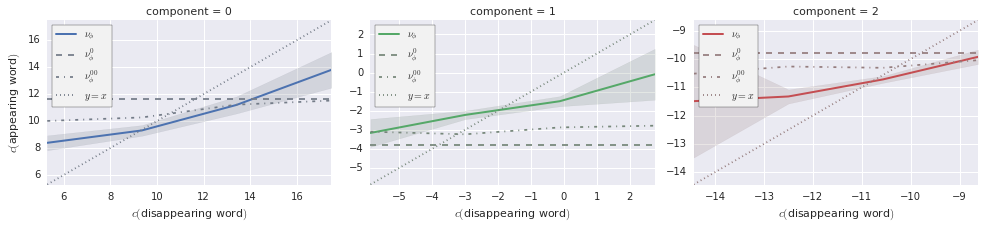

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.67536509  0.20403139]



,aoa,frequency,letters_count
Component-0,0.757138,-0.388089,0.525479
Component-1,-0.362778,0.419166,0.832281


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 11223) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   15 of 11223) |                     | Elapsed Time: 0:00:03 ETA: 0:37:46

  0% (   41 of 11223) |                     | Elapsed Time: 0:00:03 ETA: 0:14:43

  0% (   72 of 11223) |                     | Elapsed Time: 0:00:03 ETA: 0:08:54

  0% (  102 of 11223) |                     | Elapsed Time: 0:00:03 ETA: 0:06:38

  1% (  141 of 11223) |                     | Elapsed Time: 0:00:03 ETA: 0:01:18

  1% (  174 of 11223) |                     | Elapsed Time: 0:00:04 ETA: 0:01:14

  1% (  209 of 11223) |                     | Elapsed Time: 0:00:04 ETA: 0:01:10

  2% (  241 of 11223) |                     | Elapsed Time: 0:00:04 ETA: 0:01:09

  2% (  281 of 11223) |                     | Elapsed Time: 0:00:04 ETA: 0:01:07

  2% (  314 of 11223) |                     | Elapsed Time: 0:00:04 ETA: 0:01:07

  3% (  346 of 11223) |                     | Elapsed Time: 0:00:05 ETA: 0:01:07

  3% (  378 of 11223) |                     | Elapsed Time: 0:00:05 ETA: 0:01:08

  3% (  421 of 11223) |                     | Elapsed Time: 0:00:05 ETA: 0:01:09

  4% (  452 of 11223) |                     | Elapsed Time: 0:00:05 ETA: 0:01:11

  4% (  483 of 11223) |                     | Elapsed Time: 0:00:06 ETA: 0:01:11

  4% (  513 of 11223) |                     | Elapsed Time: 0:00:06 ETA: 0:01:12

  4% (  544 of 11223) |#                    | Elapsed Time: 0:00:06 ETA: 0:01:12

  5% (  577 of 11223) |#                    | Elapsed Time: 0:00:06 ETA: 0:01:11

  5% (  600 of 11223) |#                    | Elapsed Time: 0:00:06 ETA: 0:01:15

  5% (  634 of 11223) |#                    | Elapsed Time: 0:00:07 ETA: 0:01:13

  5% (  668 of 11223) |#                    | Elapsed Time: 0:00:07 ETA: 0:01:11

  6% (  702 of 11223) |#                    | Elapsed Time: 0:00:07 ETA: 0:01:09

  6% (  730 of 11223) |#                    | Elapsed Time: 0:00:07 ETA: 0:01:07

  6% (  762 of 11223) |#                    | Elapsed Time: 0:00:07 ETA: 0:01:06

  7% (  793 of 11223) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:08

  7% (  821 of 11223) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:10

  7% (  853 of 11223) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:13

  7% (  884 of 11223) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:12

  8% (  915 of 11223) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:13

  8% (  947 of 11223) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:11

  8% (  983 of 11223) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:08

  9% ( 1019 of 11223) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:03

  9% ( 1057 of 11223) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:00

  9% ( 1086 of 11223) |##                   | Elapsed Time: 0:00:10 ETA: 0:01:01

 10% ( 1123 of 11223) |##                   | Elapsed Time: 0:00:10 ETA: 0:01:02

 10% ( 1152 of 11223) |##                   | Elapsed Time: 0:00:10 ETA: 0:01:05

 10% ( 1183 of 11223) |##                   | Elapsed Time: 0:00:10 ETA: 0:01:08

 10% ( 1216 of 11223) |##                   | Elapsed Time: 0:00:10 ETA: 0:01:08

 11% ( 1263 of 11223) |##                   | Elapsed Time: 0:00:11 ETA: 0:01:05

 11% ( 1295 of 11223) |##                   | Elapsed Time: 0:00:11 ETA: 0:01:03

 11% ( 1323 of 11223) |##                   | Elapsed Time: 0:00:11 ETA: 0:01:03

 12% ( 1359 of 11223) |##                   | Elapsed Time: 0:00:11 ETA: 0:01:01

 12% ( 1403 of 11223) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:02

 12% ( 1434 of 11223) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:03

 13% ( 1462 of 11223) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:03

 13% ( 1494 of 11223) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:03

 13% ( 1544 of 11223) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:03

 14% ( 1577 of 11223) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:02

 14% ( 1609 of 11223) |###                  | Elapsed Time: 0:00:13 ETA: 0:01:01

 14% ( 1641 of 11223) |###                  | Elapsed Time: 0:00:13 ETA: 0:00:59

 15% ( 1684 of 11223) |###                  | Elapsed Time: 0:00:13 ETA: 0:00:59

 15% ( 1714 of 11223) |###                  | Elapsed Time: 0:00:14 ETA: 0:01:01

 15% ( 1746 of 11223) |###                  | Elapsed Time: 0:00:14 ETA: 0:01:00

 15% ( 1779 of 11223) |###                  | Elapsed Time: 0:00:14 ETA: 0:01:01

 16% ( 1810 of 11223) |###                  | Elapsed Time: 0:00:14 ETA: 0:01:01

 16% ( 1839 of 11223) |###                  | Elapsed Time: 0:00:14 ETA: 0:01:02

 16% ( 1873 of 11223) |###                  | Elapsed Time: 0:00:15 ETA: 0:01:00

 16% ( 1905 of 11223) |###                  | Elapsed Time: 0:00:15 ETA: 0:01:01

 17% ( 1936 of 11223) |###                  | Elapsed Time: 0:00:15 ETA: 0:01:01

 17% ( 1981 of 11223) |###                  | Elapsed Time: 0:00:15 ETA: 0:00:59

 17% ( 2013 of 11223) |###                  | Elapsed Time: 0:00:16 ETA: 0:00:59

 18% ( 2050 of 11223) |###                  | Elapsed Time: 0:00:16 ETA: 0:00:58

 18% ( 2083 of 11223) |###                  | Elapsed Time: 0:00:16 ETA: 0:00:57

 18% ( 2121 of 11223) |###                  | Elapsed Time: 0:00:16 ETA: 0:00:57

 19% ( 2153 of 11223) |####                 | Elapsed Time: 0:00:16 ETA: 0:00:56

 19% ( 2183 of 11223) |####                 | Elapsed Time: 0:00:17 ETA: 0:00:58

 19% ( 2216 of 11223) |####                 | Elapsed Time: 0:00:17 ETA: 0:00:59

 20% ( 2262 of 11223) |####                 | Elapsed Time: 0:00:17 ETA: 0:00:58

 20% ( 2290 of 11223) |####                 | Elapsed Time: 0:00:17 ETA: 0:00:59

 20% ( 2320 of 11223) |####                 | Elapsed Time: 0:00:18 ETA: 0:01:00

 20% ( 2354 of 11223) |####                 | Elapsed Time: 0:00:18 ETA: 0:00:59

 21% ( 2400 of 11223) |####                 | Elapsed Time: 0:00:18 ETA: 0:00:58

 21% ( 2433 of 11223) |####                 | Elapsed Time: 0:00:18 ETA: 0:00:57

 21% ( 2460 of 11223) |####                 | Elapsed Time: 0:00:19 ETA: 0:00:58

 22% ( 2492 of 11223) |####                 | Elapsed Time: 0:00:19 ETA: 0:00:57

 22% ( 2526 of 11223) |####                 | Elapsed Time: 0:00:19 ETA: 0:00:57

 22% ( 2561 of 11223) |####                 | Elapsed Time: 0:00:19 ETA: 0:00:56

 23% ( 2593 of 11223) |####                 | Elapsed Time: 0:00:19 ETA: 0:00:53

 23% ( 2628 of 11223) |####                 | Elapsed Time: 0:00:20 ETA: 0:00:52

 23% ( 2666 of 11223) |####                 | Elapsed Time: 0:00:20 ETA: 0:00:51

 24% ( 2696 of 11223) |#####                | Elapsed Time: 0:00:20 ETA: 0:00:54

 24% ( 2733 of 11223) |#####                | Elapsed Time: 0:00:20 ETA: 0:00:52

 24% ( 2767 of 11223) |#####                | Elapsed Time: 0:00:20 ETA: 0:00:52

 25% ( 2806 of 11223) |#####                | Elapsed Time: 0:00:21 ETA: 0:00:52

 25% ( 2832 of 11223) |#####                | Elapsed Time: 0:00:21 ETA: 0:00:53

 25% ( 2862 of 11223) |#####                | Elapsed Time: 0:00:21 ETA: 0:00:54

 25% ( 2897 of 11223) |#####                | Elapsed Time: 0:00:21 ETA: 0:00:54

 26% ( 2947 of 11223) |#####                | Elapsed Time: 0:00:22 ETA: 0:00:54

 26% ( 2983 of 11223) |#####                | Elapsed Time: 0:00:22 ETA: 0:00:50

 26% ( 3020 of 11223) |#####                | Elapsed Time: 0:00:22 ETA: 0:00:48

 27% ( 3056 of 11223) |#####                | Elapsed Time: 0:00:22 ETA: 0:00:47

 27% ( 3104 of 11223) |#####                | Elapsed Time: 0:00:22 ETA: 0:00:46

 27% ( 3135 of 11223) |#####                | Elapsed Time: 0:00:23 ETA: 0:00:48

 28% ( 3165 of 11223) |#####                | Elapsed Time: 0:00:23 ETA: 0:00:49

 28% ( 3201 of 11223) |#####                | Elapsed Time: 0:00:23 ETA: 0:00:49

 28% ( 3246 of 11223) |######               | Elapsed Time: 0:00:23 ETA: 0:00:49

 29% ( 3283 of 11223) |######               | Elapsed Time: 0:00:24 ETA: 0:00:48

 29% ( 3316 of 11223) |######               | Elapsed Time: 0:00:24 ETA: 0:00:46

 29% ( 3351 of 11223) |######               | Elapsed Time: 0:00:24 ETA: 0:00:46

 30% ( 3383 of 11223) |######               | Elapsed Time: 0:00:24 ETA: 0:00:46

 30% ( 3415 of 11223) |######               | Elapsed Time: 0:00:24 ETA: 0:00:48

 30% ( 3447 of 11223) |######               | Elapsed Time: 0:00:25 ETA: 0:00:49

 31% ( 3483 of 11223) |######               | Elapsed Time: 0:00:25 ETA: 0:00:47

 31% ( 3523 of 11223) |######               | Elapsed Time: 0:00:25 ETA: 0:00:48

 31% ( 3556 of 11223) |######               | Elapsed Time: 0:00:25 ETA: 0:00:48

 31% ( 3589 of 11223) |######               | Elapsed Time: 0:00:25 ETA: 0:00:46

 32% ( 3623 of 11223) |######               | Elapsed Time: 0:00:26 ETA: 0:00:47

 32% ( 3664 of 11223) |######               | Elapsed Time: 0:00:26 ETA: 0:00:47

 32% ( 3694 of 11223) |######               | Elapsed Time: 0:00:26 ETA: 0:00:48

 33% ( 3728 of 11223) |######               | Elapsed Time: 0:00:26 ETA: 0:00:47

 33% ( 3762 of 11223) |#######              | Elapsed Time: 0:00:27 ETA: 0:00:47

 33% ( 3804 of 11223) |#######              | Elapsed Time: 0:00:27 ETA: 0:00:47

 34% ( 3837 of 11223) |#######              | Elapsed Time: 0:00:27 ETA: 0:00:46

 34% ( 3873 of 11223) |#######              | Elapsed Time: 0:00:27 ETA: 0:00:45

 34% ( 3907 of 11223) |#######              | Elapsed Time: 0:00:27 ETA: 0:00:44

 35% ( 3945 of 11223) |#######              | Elapsed Time: 0:00:28 ETA: 0:00:46

 35% ( 3978 of 11223) |#######              | Elapsed Time: 0:00:28 ETA: 0:00:45

 35% ( 4014 of 11223) |#######              | Elapsed Time: 0:00:28 ETA: 0:00:44

 36% ( 4049 of 11223) |#######              | Elapsed Time: 0:00:28 ETA: 0:00:44

 36% ( 4086 of 11223) |#######              | Elapsed Time: 0:00:29 ETA: 0:00:42

 36% ( 4120 of 11223) |#######              | Elapsed Time: 0:00:29 ETA: 0:00:42

 37% ( 4155 of 11223) |#######              | Elapsed Time: 0:00:29 ETA: 0:00:41

 37% ( 4184 of 11223) |#######              | Elapsed Time: 0:00:29 ETA: 0:00:43

 37% ( 4209 of 11223) |#######              | Elapsed Time: 0:00:29 ETA: 0:00:47

 37% ( 4231 of 11223) |#######              | Elapsed Time: 0:00:30 ETA: 0:00:52

 37% ( 4260 of 11223) |#######              | Elapsed Time: 0:00:30 ETA: 0:00:55

 38% ( 4295 of 11223) |########             | Elapsed Time: 0:00:30 ETA: 0:00:53

 38% ( 4327 of 11223) |########             | Elapsed Time: 0:00:30 ETA: 0:00:50

 38% ( 4367 of 11223) |########             | Elapsed Time: 0:00:31 ETA: 0:00:44

 39% ( 4398 of 11223) |########             | Elapsed Time: 0:00:31 ETA: 0:00:43

 39% ( 4424 of 11223) |########             | Elapsed Time: 0:00:31 ETA: 0:00:45

 39% ( 4456 of 11223) |########             | Elapsed Time: 0:00:31 ETA: 0:00:45

 40% ( 4490 of 11223) |########             | Elapsed Time: 0:00:31 ETA: 0:00:45

 40% ( 4523 of 11223) |########             | Elapsed Time: 0:00:32 ETA: 0:00:45

 40% ( 4557 of 11223) |########             | Elapsed Time: 0:00:32 ETA: 0:00:42

 40% ( 4591 of 11223) |########             | Elapsed Time: 0:00:32 ETA: 0:00:41

 41% ( 4630 of 11223) |########             | Elapsed Time: 0:00:32 ETA: 0:00:40

 41% ( 4664 of 11223) |########             | Elapsed Time: 0:00:32 ETA: 0:00:40

 41% ( 4696 of 11223) |########             | Elapsed Time: 0:00:33 ETA: 0:00:40

 42% ( 4721 of 11223) |########             | Elapsed Time: 0:00:33 ETA: 0:00:43

 42% ( 4752 of 11223) |########             | Elapsed Time: 0:00:33 ETA: 0:00:43

 42% ( 4786 of 11223) |########             | Elapsed Time: 0:00:33 ETA: 0:00:43

 42% ( 4816 of 11223) |#########            | Elapsed Time: 0:00:33 ETA: 0:00:43

 43% ( 4844 of 11223) |#########            | Elapsed Time: 0:00:34 ETA: 0:00:44

 43% ( 4875 of 11223) |#########            | Elapsed Time: 0:00:34 ETA: 0:00:42

 43% ( 4911 of 11223) |#########            | Elapsed Time: 0:00:34 ETA: 0:00:41

 44% ( 4944 of 11223) |#########            | Elapsed Time: 0:00:34 ETA: 0:00:41

 44% ( 4974 of 11223) |#########            | Elapsed Time: 0:00:35 ETA: 0:00:40

 44% ( 5006 of 11223) |#########            | Elapsed Time: 0:00:35 ETA: 0:00:39

 44% ( 5033 of 11223) |#########            | Elapsed Time: 0:00:35 ETA: 0:00:41

 45% ( 5068 of 11223) |#########            | Elapsed Time: 0:00:35 ETA: 0:00:41

 45% ( 5097 of 11223) |#########            | Elapsed Time: 0:00:35 ETA: 0:00:42

 45% ( 5121 of 11223) |#########            | Elapsed Time: 0:00:36 ETA: 0:00:44

 45% ( 5150 of 11223) |#########            | Elapsed Time: 0:00:36 ETA: 0:00:44

 46% ( 5191 of 11223) |#########            | Elapsed Time: 0:00:36 ETA: 0:00:42

 46% ( 5224 of 11223) |#########            | Elapsed Time: 0:00:36 ETA: 0:00:43

 46% ( 5258 of 11223) |#########            | Elapsed Time: 0:00:36 ETA: 0:00:40

 47% ( 5291 of 11223) |#########            | Elapsed Time: 0:00:37 ETA: 0:00:36

 47% ( 5331 of 11223) |#########            | Elapsed Time: 0:00:37 ETA: 0:00:36

 47% ( 5364 of 11223) |##########           | Elapsed Time: 0:00:37 ETA: 0:00:35

 48% ( 5395 of 11223) |##########           | Elapsed Time: 0:00:37 ETA: 0:00:36

 48% ( 5431 of 11223) |##########           | Elapsed Time: 0:00:38 ETA: 0:00:35

 48% ( 5472 of 11223) |##########           | Elapsed Time: 0:00:38 ETA: 0:00:34

 49% ( 5501 of 11223) |##########           | Elapsed Time: 0:00:38 ETA: 0:00:35

 49% ( 5530 of 11223) |##########           | Elapsed Time: 0:00:38 ETA: 0:00:36

 49% ( 5561 of 11223) |##########           | Elapsed Time: 0:00:38 ETA: 0:00:36

 49% ( 5593 of 11223) |##########           | Elapsed Time: 0:00:39 ETA: 0:00:36

 50% ( 5631 of 11223) |##########           | Elapsed Time: 0:00:39 ETA: 0:00:36

 50% ( 5668 of 11223) |##########           | Elapsed Time: 0:00:39 ETA: 0:00:34

 50% ( 5702 of 11223) |##########           | Elapsed Time: 0:00:39 ETA: 0:00:33

 51% ( 5735 of 11223) |##########           | Elapsed Time: 0:00:39 ETA: 0:00:33

 51% ( 5765 of 11223) |##########           | Elapsed Time: 0:00:40 ETA: 0:00:33

 51% ( 5801 of 11223) |##########           | Elapsed Time: 0:00:40 ETA: 0:00:33

 51% ( 5830 of 11223) |##########           | Elapsed Time: 0:00:40 ETA: 0:00:35

 52% ( 5864 of 11223) |##########           | Elapsed Time: 0:00:40 ETA: 0:00:34

 52% ( 5911 of 11223) |###########          | Elapsed Time: 0:00:41 ETA: 0:00:32

 52% ( 5935 of 11223) |###########          | Elapsed Time: 0:00:41 ETA: 0:00:33

 53% ( 5958 of 11223) |###########          | Elapsed Time: 0:00:41 ETA: 0:00:36

 53% ( 5983 of 11223) |###########          | Elapsed Time: 0:00:41 ETA: 0:00:37

 53% ( 6033 of 11223) |###########          | Elapsed Time: 0:00:41 ETA: 0:00:38

 54% ( 6068 of 11223) |###########          | Elapsed Time: 0:00:42 ETA: 0:00:37

 54% ( 6103 of 11223) |###########          | Elapsed Time: 0:00:42 ETA: 0:00:33

 54% ( 6131 of 11223) |###########          | Elapsed Time: 0:00:42 ETA: 0:00:32

 54% ( 6162 of 11223) |###########          | Elapsed Time: 0:00:42 ETA: 0:00:31

 55% ( 6190 of 11223) |###########          | Elapsed Time: 0:00:42 ETA: 0:00:32

 55% ( 6219 of 11223) |###########          | Elapsed Time: 0:00:43 ETA: 0:00:34

 55% ( 6252 of 11223) |###########          | Elapsed Time: 0:00:43 ETA: 0:00:34

 56% ( 6288 of 11223) |###########          | Elapsed Time: 0:00:43 ETA: 0:00:32

 56% ( 6332 of 11223) |###########          | Elapsed Time: 0:00:43 ETA: 0:00:30

 56% ( 6368 of 11223) |###########          | Elapsed Time: 0:00:44 ETA: 0:00:29

 57% ( 6406 of 11223) |###########          | Elapsed Time: 0:00:44 ETA: 0:00:27

 57% ( 6439 of 11223) |############         | Elapsed Time: 0:00:44 ETA: 0:00:27

 57% ( 6469 of 11223) |############         | Elapsed Time: 0:00:44 ETA: 0:00:28

 57% ( 6507 of 11223) |############         | Elapsed Time: 0:00:44 ETA: 0:00:28

 58% ( 6541 of 11223) |############         | Elapsed Time: 0:00:45 ETA: 0:00:28

 58% ( 6594 of 11223) |############         | Elapsed Time: 0:00:45 ETA: 0:00:28

 59% ( 6628 of 11223) |############         | Elapsed Time: 0:00:45 ETA: 0:00:27

 59% ( 6661 of 11223) |############         | Elapsed Time: 0:00:45 ETA: 0:00:27

 59% ( 6690 of 11223) |############         | Elapsed Time: 0:00:46 ETA: 0:00:28

 60% ( 6734 of 11223) |############         | Elapsed Time: 0:00:46 ETA: 0:00:27

 60% ( 6769 of 11223) |############         | Elapsed Time: 0:00:46 ETA: 0:00:28

 60% ( 6803 of 11223) |############         | Elapsed Time: 0:00:46 ETA: 0:00:27

 60% ( 6837 of 11223) |############         | Elapsed Time: 0:00:46 ETA: 0:00:27

 61% ( 6875 of 11223) |############         | Elapsed Time: 0:00:47 ETA: 0:00:26

 61% ( 6904 of 11223) |############         | Elapsed Time: 0:00:47 ETA: 0:00:27

 61% ( 6934 of 11223) |############         | Elapsed Time: 0:00:47 ETA: 0:00:28

 62% ( 6961 of 11223) |#############        | Elapsed Time: 0:00:47 ETA: 0:00:29

 62% ( 6998 of 11223) |#############        | Elapsed Time: 0:00:47 ETA: 0:00:28

 62% ( 7032 of 11223) |#############        | Elapsed Time: 0:00:48 ETA: 0:00:27

 62% ( 7065 of 11223) |#############        | Elapsed Time: 0:00:48 ETA: 0:00:26

 63% ( 7099 of 11223) |#############        | Elapsed Time: 0:00:48 ETA: 0:00:25

 63% ( 7136 of 11223) |#############        | Elapsed Time: 0:00:48 ETA: 0:00:24

 63% ( 7170 of 11223) |#############        | Elapsed Time: 0:00:49 ETA: 0:00:24

 64% ( 7206 of 11223) |#############        | Elapsed Time: 0:00:49 ETA: 0:00:24

 64% ( 7238 of 11223) |#############        | Elapsed Time: 0:00:49 ETA: 0:00:24

 64% ( 7269 of 11223) |#############        | Elapsed Time: 0:00:49 ETA: 0:00:24

 65% ( 7313 of 11223) |#############        | Elapsed Time: 0:00:49 ETA: 0:00:24

 65% ( 7350 of 11223) |#############        | Elapsed Time: 0:00:50 ETA: 0:00:23

 65% ( 7383 of 11223) |#############        | Elapsed Time: 0:00:50 ETA: 0:00:23

 66% ( 7417 of 11223) |#############        | Elapsed Time: 0:00:50 ETA: 0:00:23

 66% ( 7453 of 11223) |#############        | Elapsed Time: 0:00:50 ETA: 0:00:22

 66% ( 7487 of 11223) |##############       | Elapsed Time: 0:00:50 ETA: 0:00:22

 67% ( 7522 of 11223) |##############       | Elapsed Time: 0:00:51 ETA: 0:00:22

 67% ( 7555 of 11223) |##############       | Elapsed Time: 0:00:51 ETA: 0:00:22

 67% ( 7595 of 11223) |##############       | Elapsed Time: 0:00:51 ETA: 0:00:21

 67% ( 7630 of 11223) |##############       | Elapsed Time: 0:00:51 ETA: 0:00:21

 68% ( 7665 of 11223) |##############       | Elapsed Time: 0:00:52 ETA: 0:00:20

 68% ( 7716 of 11223) |##############       | Elapsed Time: 0:00:52 ETA: 0:00:20

 69% ( 7753 of 11223) |##############       | Elapsed Time: 0:00:52 ETA: 0:00:20

 69% ( 7789 of 11223) |##############       | Elapsed Time: 0:00:52 ETA: 0:00:19

 69% ( 7821 of 11223) |##############       | Elapsed Time: 0:00:52 ETA: 0:00:20

 70% ( 7857 of 11223) |##############       | Elapsed Time: 0:00:53 ETA: 0:00:20

 70% ( 7891 of 11223) |##############       | Elapsed Time: 0:00:53 ETA: 0:00:20

 70% ( 7922 of 11223) |##############       | Elapsed Time: 0:00:53 ETA: 0:00:20

 70% ( 7950 of 11223) |##############       | Elapsed Time: 0:00:53 ETA: 0:00:21

 71% ( 7997 of 11223) |##############       | Elapsed Time: 0:00:54 ETA: 0:00:20

 71% ( 8031 of 11223) |###############      | Elapsed Time: 0:00:54 ETA: 0:00:20

 71% ( 8067 of 11223) |###############      | Elapsed Time: 0:00:54 ETA: 0:00:19

 72% ( 8103 of 11223) |###############      | Elapsed Time: 0:00:54 ETA: 0:00:18

 72% ( 8137 of 11223) |###############      | Elapsed Time: 0:00:54 ETA: 0:00:18

 72% ( 8171 of 11223) |###############      | Elapsed Time: 0:00:55 ETA: 0:00:18

 73% ( 8205 of 11223) |###############      | Elapsed Time: 0:00:55 ETA: 0:00:18

 73% ( 8236 of 11223) |###############      | Elapsed Time: 0:00:55 ETA: 0:00:18

 73% ( 8277 of 11223) |###############      | Elapsed Time: 0:00:55 ETA: 0:00:19

 74% ( 8315 of 11223) |###############      | Elapsed Time: 0:00:55 ETA: 0:00:18

 74% ( 8352 of 11223) |###############      | Elapsed Time: 0:00:56 ETA: 0:00:17

 74% ( 8388 of 11223) |###############      | Elapsed Time: 0:00:56 ETA: 0:00:16

 75% ( 8434 of 11223) |###############      | Elapsed Time: 0:00:56 ETA: 0:00:15

 75% ( 8470 of 11223) |###############      | Elapsed Time: 0:00:56 ETA: 0:00:15

 75% ( 8502 of 11223) |###############      | Elapsed Time: 0:00:57 ETA: 0:00:15

 76% ( 8535 of 11223) |###############      | Elapsed Time: 0:00:57 ETA: 0:00:15

 76% ( 8575 of 11223) |################     | Elapsed Time: 0:00:57 ETA: 0:00:16

 76% ( 8610 of 11223) |################     | Elapsed Time: 0:00:57 ETA: 0:00:16

 77% ( 8647 of 11223) |################     | Elapsed Time: 0:00:57 ETA: 0:00:15

 77% ( 8698 of 11223) |################     | Elapsed Time: 0:00:58 ETA: 0:00:15

 77% ( 8736 of 11223) |################     | Elapsed Time: 0:00:58 ETA: 0:00:14

 78% ( 8775 of 11223) |################     | Elapsed Time: 0:00:58 ETA: 0:00:13

 78% ( 8814 of 11223) |################     | Elapsed Time: 0:00:58 ETA: 0:00:13

 78% ( 8857 of 11223) |################     | Elapsed Time: 0:00:59 ETA: 0:00:13

 79% ( 8892 of 11223) |################     | Elapsed Time: 0:00:59 ETA: 0:00:13

 79% ( 8932 of 11223) |################     | Elapsed Time: 0:00:59 ETA: 0:00:13

 80% ( 8979 of 11223) |################     | Elapsed Time: 0:00:59 ETA: 0:00:12

 80% ( 9017 of 11223) |################     | Elapsed Time: 0:01:00 ETA: 0:00:12

 80% ( 9048 of 11223) |################     | Elapsed Time: 0:01:00 ETA: 0:00:11

 80% ( 9081 of 11223) |################     | Elapsed Time: 0:01:00 ETA: 0:00:12

 81% ( 9119 of 11223) |#################    | Elapsed Time: 0:01:00 ETA: 0:00:12

 81% ( 9145 of 11223) |#################    | Elapsed Time: 0:01:00 ETA: 0:00:13

 81% ( 9171 of 11223) |#################    | Elapsed Time: 0:01:01 ETA: 0:00:14

 82% ( 9208 of 11223) |#################    | Elapsed Time: 0:01:01 ETA: 0:00:13

 82% ( 9245 of 11223) |#################    | Elapsed Time: 0:01:01 ETA: 0:00:13

 82% ( 9275 of 11223) |#################    | Elapsed Time: 0:01:01 ETA: 0:00:12

 82% ( 9310 of 11223) |#################    | Elapsed Time: 0:01:01 ETA: 0:00:11

 83% ( 9338 of 11223) |#################    | Elapsed Time: 0:01:02 ETA: 0:00:11

 83% ( 9373 of 11223) |#################    | Elapsed Time: 0:01:02 ETA: 0:00:11

 83% ( 9417 of 11223) |#################    | Elapsed Time: 0:01:02 ETA: 0:00:11

 84% ( 9447 of 11223) |#################    | Elapsed Time: 0:01:02 ETA: 0:00:11

 84% ( 9480 of 11223) |#################    | Elapsed Time: 0:01:03 ETA: 0:00:10

 84% ( 9514 of 11223) |#################    | Elapsed Time: 0:01:03 ETA: 0:00:10

 85% ( 9556 of 11223) |#################    | Elapsed Time: 0:01:03 ETA: 0:00:10

 85% ( 9591 of 11223) |#################    | Elapsed Time: 0:01:03 ETA: 0:00:09

 85% ( 9621 of 11223) |##################   | Elapsed Time: 0:01:03 ETA: 0:00:10

 86% ( 9659 of 11223) |##################   | Elapsed Time: 0:01:04 ETA: 0:00:09

 86% ( 9698 of 11223) |##################   | Elapsed Time: 0:01:04 ETA: 0:00:09

 86% ( 9732 of 11223) |##################   | Elapsed Time: 0:01:04 ETA: 0:00:09

 87% ( 9767 of 11223) |##################   | Elapsed Time: 0:01:04 ETA: 0:00:08

 87% ( 9799 of 11223) |##################   | Elapsed Time: 0:01:04 ETA: 0:00:08

 87% ( 9841 of 11223) |##################   | Elapsed Time: 0:01:05 ETA: 0:00:08

 88% ( 9878 of 11223) |##################   | Elapsed Time: 0:01:05 ETA: 0:00:07

 88% ( 9913 of 11223) |##################   | Elapsed Time: 0:01:05 ETA: 0:00:07

 88% ( 9961 of 11223) |##################   | Elapsed Time: 0:01:05 ETA: 0:00:07

 89% ( 9999 of 11223) |##################   | Elapsed Time: 0:01:06 ETA: 0:00:07

 89% (10036 of 11223) |##################   | Elapsed Time: 0:01:06 ETA: 0:00:06

 89% (10071 of 11223) |##################   | Elapsed Time: 0:01:06 ETA: 0:00:06

 90% (10116 of 11223) |##################   | Elapsed Time: 0:01:06 ETA: 0:00:06

 90% (10148 of 11223) |##################   | Elapsed Time: 0:01:07 ETA: 0:00:06

 90% (10185 of 11223) |###################  | Elapsed Time: 0:01:07 ETA: 0:00:06

 91% (10219 of 11223) |###################  | Elapsed Time: 0:01:07 ETA: 0:00:06

 91% (10259 of 11223) |###################  | Elapsed Time: 0:01:07 ETA: 0:00:05

 91% (10295 of 11223) |###################  | Elapsed Time: 0:01:07 ETA: 0:00:05

 92% (10327 of 11223) |###################  | Elapsed Time: 0:01:08 ETA: 0:00:05

 92% (10360 of 11223) |###################  | Elapsed Time: 0:01:08 ETA: 0:00:05

 92% (10400 of 11223) |###################  | Elapsed Time: 0:01:08 ETA: 0:00:04

 92% (10437 of 11223) |###################  | Elapsed Time: 0:01:08 ETA: 0:00:04

 93% (10473 of 11223) |###################  | Elapsed Time: 0:01:08 ETA: 0:00:04

 93% (10522 of 11223) |###################  | Elapsed Time: 0:01:09 ETA: 0:00:04

 94% (10557 of 11223) |###################  | Elapsed Time: 0:01:09 ETA: 0:00:03

 94% (10591 of 11223) |###################  | Elapsed Time: 0:01:09 ETA: 0:00:03

 94% (10627 of 11223) |###################  | Elapsed Time: 0:01:09 ETA: 0:00:03

 95% (10662 of 11223) |###################  | Elapsed Time: 0:01:10 ETA: 0:00:03

 95% (10698 of 11223) |#################### | Elapsed Time: 0:01:10 ETA: 0:00:03

 95% (10729 of 11223) |#################### | Elapsed Time: 0:01:10 ETA: 0:00:02

 95% (10761 of 11223) |#################### | Elapsed Time: 0:01:10 ETA: 0:00:02

 96% (10803 of 11223) |#################### | Elapsed Time: 0:01:10 ETA: 0:00:02

 96% (10841 of 11223) |#################### | Elapsed Time: 0:01:11 ETA: 0:00:02

 97% (10892 of 11223) |#################### | Elapsed Time: 0:01:11 ETA: 0:00:01

 97% (10926 of 11223) |#################### | Elapsed Time: 0:01:11 ETA: 0:00:01

 97% (10961 of 11223) |#################### | Elapsed Time: 0:01:11 ETA: 0:00:01

 97% (10995 of 11223) |#################### | Elapsed Time: 0:01:11 ETA: 0:00:01

 98% (11028 of 11223) |#################### | Elapsed Time: 0:01:12 ETA: 0:00:01

 98% (11060 of 11223) |#################### | Elapsed Time: 0:01:12 ETA: 0:00:01

 98% (11101 of 11223) |#################### | Elapsed Time: 0:01:12 ETA: 0:00:00

 99% (11138 of 11223) |#################### | Elapsed Time: 0:01:12 ETA: 0:00:00

 99% (11175 of 11223) |#################### | Elapsed Time: 0:01:13 ETA: 0:00:00

100% (11223 of 11223) |####################| Elapsed Time: 0:01:13 Time: 0:01:13


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | **  | ns. |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | ns. | *** | *** | *** |
H_00 | ns. | *** | *** | *** |


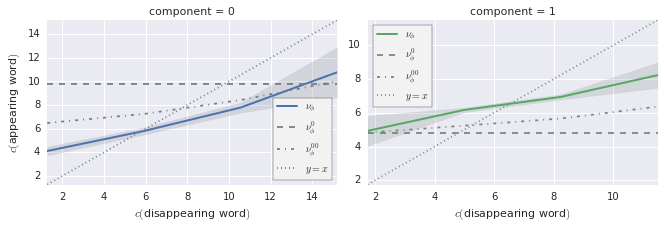

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1287 (cluster-unique) substitutions, but the PCA is in fact computed on 988 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global


    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

---
aoa
---

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency


    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global
    * global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> orthographic_density


   ** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
   ** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
   ** global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
    * global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
   ** global -> sentence-relative


  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative


    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global
    * global -> sentence-relative


    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

---
aoa
---

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering


  *** global -> global
  *** global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


  *** global -> global
  *** global -> sentence-relative


   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global


  ns. global -> sentence-relative
    * sentence-relative -> global


   ** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency


  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


  ns. global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
    * global -> global


  ns. global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global


  ns. global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 777 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.1481113553980814

intercept                      4.425644
global_aoa                     0.088085
global_clustering              0.087866
global_frequency               0.512785
global_letters_count          -0.048184
global_orthographic_density   -0.010171
global_synonyms_count         -0.005553
dtype: float64

Regressing global frequency with 777 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.16952757065026947

intercept                                             -1.223568
global_aoa                                            -0.005025
global_clustering                                      0.389805
global_frequency                                       1.625890
global_letters_count                                   0.227516
global_orthographic_density                            1.689159
global_synon

Regressing rel frequency with 777 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.27713312809675195

intercept                  -1.191482
rel_aoa                     0.063959
rel_clustering              0.160655
rel_frequency               0.645187
rel_letters_count          -0.062644
rel_orthographic_density   -0.141234
rel_synonyms_count          0.063578
dtype: float64

Regressing rel frequency with 777 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.2990447461119662

intercept                                       -1.306339
rel_aoa                                          0.051839
rel_clustering                                   0.077506
rel_frequency                                    0.655671
rel_letters_count                               -0.064851
rel_orthographic_density                        -0.550125
rel_synonyms_count                               0.330714
rel_aoa * rel_clustering                        -0.051017
rel_aoa * rel_frequency             

Regressing rel frequency with 777 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.38093461673274787

intercept                                                -10.189475
global_aoa                                                -0.213709
global_clustering                                         -3.653567
global_frequency                                           0.628120
global_letters_count                                      -0.565299
global_orthographic_density                                2.665291
global_synonyms_count                                    -10.304478
rel_aoa                                                    1.701487
rel_clustering                                             3.469996
rel_frequency                                              1.026611
rel_letters_count                                          1.506033
rel_orthographic_density                                   3.436509
rel_synonyms_count                                        11.995644
gl

Regressing global aoa with 698 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.10294255424025778

intercept                                        6.567071
rel_aoa                                         -0.230740
rel_clustering                                   0.146387
rel_frequency                                    0.106897
rel_letters_count                                0.101561
rel_orthographic_density                        -0.235977
rel_synonyms_count                               0.119171
rel_aoa * rel_clustering                         0.104902
rel_aoa * rel_frequency                         -0.138645
rel_aoa * rel_letters_count                     -0.020977
rel_aoa * rel_orthographic_density               0.029672
rel_aoa * rel_synonyms_count                     0.038639
rel_clustering * rel_frequency                   0.143109
rel_clustering * rel_letters_count               0.114055
rel_clustering * rel_orthographic_density       -0.092899
rel_clustering * rel_s

Regressing rel aoa with 698 measures, with interactions
           ^^^^^^^
R^2 = 0.3432552979428021

intercept                                                 39.681420
global_aoa                                                -0.465130
global_clustering                                          3.719910
global_frequency                                          -1.948280
global_letters_count                                      -2.519902
global_orthographic_density                              -12.265451
global_synonyms_count                                      1.807438
rel_aoa                                                    0.150346
rel_clustering                                            -1.738761
rel_frequency                                              1.670255
rel_letters_count                                          2.475255
rel_orthographic_density                                   7.189322
rel_synonyms_count                                        -8.922138
global_aoa * gl

Regressing global clustering with 641 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.07900026480363198

intercept                                       -5.827151
rel_aoa                                         -0.040002
rel_clustering                                   0.149719
rel_frequency                                    0.041906
rel_letters_count                               -0.001871
rel_orthographic_density                         0.071826
rel_synonyms_count                              -0.081324
rel_aoa * rel_clustering                         0.027668
rel_aoa * rel_frequency                         -0.012188
rel_aoa * rel_letters_count                     -0.023488
rel_aoa * rel_orthographic_density              -0.029626
rel_aoa * rel_synonyms_count                     0.009762
rel_clustering * rel_frequency                  -0.017689
rel_clustering * rel_letters_count              -0.014332
rel_clustering * rel_orthographic_density       -0.044323
rel_clus

Regressing rel clustering with 641 measures, with interactions
           ^^^^^^^^^^^^^^
R^2 = 0.36855737758846707

intercept                                                 19.376562
global_aoa                                                 0.187626
global_clustering                                          3.385277
global_frequency                                          -1.553601
global_letters_count                                      -0.940865
global_orthographic_density                               -1.227043
global_synonyms_count                                      0.212666
rel_aoa                                                   -0.180354
rel_clustering                                            -3.572159
rel_frequency                                              0.430241
rel_letters_count                                          0.580840
rel_orthographic_density                                  -0.339617
rel_synonyms_count                                        -1.849963


Regressing global letters_count with 777 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.10388686084238374

intercept                                        5.583312
rel_aoa                                         -0.238057
rel_clustering                                   0.013846
rel_frequency                                    0.088005
rel_letters_count                                0.402625
rel_orthographic_density                        -0.114521
rel_synonyms_count                              -0.203700
rel_aoa * rel_clustering                         0.019121
rel_aoa * rel_frequency                         -0.038783
rel_aoa * rel_letters_count                      0.004169
rel_aoa * rel_orthographic_density              -0.007634
rel_aoa * rel_synonyms_count                     0.047357
rel_clustering * rel_frequency                  -0.001332
rel_clustering * rel_letters_count               0.044927
rel_clustering * rel_orthographic_density        0.121818
re

Regressing rel letters_count with 777 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.2755355492552616

intercept                                                -18.652384
global_aoa                                                 2.145122
global_clustering                                         -2.885357
global_frequency                                           1.104170
global_letters_count                                      -1.577175
global_orthographic_density                               -0.788624
global_synonyms_count                                      7.797718
rel_aoa                                                   -4.066294
rel_clustering                                            -3.136101
rel_frequency                                             -0.336552
rel_letters_count                                          1.714333
rel_orthographic_density                                  -5.235854
rel_synonyms_count                                        -9.23

Regressing global synonyms_count with 752 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.09232648887878925

intercept                                        0.461848
rel_aoa                                          0.019849
rel_clustering                                  -0.057714
rel_frequency                                   -0.007334
rel_letters_count                               -0.076341
rel_orthographic_density                         0.080584
rel_synonyms_count                               0.135500
rel_aoa * rel_clustering                        -0.000877
rel_aoa * rel_frequency                         -0.001523
rel_aoa * rel_letters_count                      0.018333
rel_aoa * rel_orthographic_density               0.043638
rel_aoa * rel_synonyms_count                     0.023898
rel_clustering * rel_frequency                  -0.000023
rel_clustering * rel_letters_count              -0.013230
rel_clustering * rel_orthographic_density       -0.083993


Regressing rel synonyms_count with 752 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.3159527026496939

intercept                                                -3.884631
global_aoa                                                0.384906
global_clustering                                         0.635473
global_frequency                                          0.288405
global_letters_count                                      0.721027
global_orthographic_density                               0.969368
global_synonyms_count                                     4.272558
rel_aoa                                                   0.297351
rel_clustering                                           -0.534745
rel_frequency                                            -0.618750
rel_letters_count                                        -0.633542
rel_orthographic_density                                  0.132518
rel_synonyms_count                                       -5.155658
global

Regressing global orthographic_density with 656 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.10973795047995762

intercept                                        1.540439
rel_aoa                                          0.068228
rel_clustering                                   0.041200
rel_frequency                                   -0.036209
rel_letters_count                               -0.083900
rel_orthographic_density                         0.199728
rel_synonyms_count                               0.090679
rel_aoa * rel_clustering                         0.015577
rel_aoa * rel_frequency                          0.025223
rel_aoa * rel_letters_count                      0.001771
rel_aoa * rel_orthographic_density               0.025420
rel_aoa * rel_synonyms_count                    -0.022097
rel_clustering * rel_frequency                  -0.003890
rel_clustering * rel_letters_count              -0.020676
rel_clustering * rel_orthographic_density     

Regressing rel orthographic_density with 656 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.3090754396321932

intercept                                                 7.980897
global_aoa                                               -0.603748
global_clustering                                         1.520874
global_frequency                                          0.160475
global_letters_count                                     -0.261707
global_orthographic_density                              -0.233273
global_synonyms_count                                    -3.450669
rel_aoa                                                   0.402505
rel_clustering                                           -0.719787
rel_frequency                                            -0.503686
rel_letters_count                                         0.125307
rel_orthographic_density                                  1.732978
rel_synonyms_count                                        7.8